# 1. Importing Package

In [1]:
# Importing General Package
!pip3 install imblearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas import Series
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
from scipy.spatial import distance
from sklearn.ensemble import IsolationForest
from scipy.stats import randint
import random

# -----Scaling------
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# -----Feature Selection------
from scipy.spatial import distance
from sklearn.decomposition import PCA

# -----Classification Metrics------
from sklearn.metrics import auc
from sklearn.metrics import precision_score as precision
from sklearn.metrics import precision_recall_curve as pc_curve
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from math import sqrt

# -----Sampling Technique------
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

# -----Logistic Regression------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from numpy import arange
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegressionCV

# -----Decision Tree------
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
!pip install pydotplus -q
import pydotplus

# -----Random Forest-------
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# -----Ada Boost------
from sklearn.ensemble import AdaBoostClassifier

# -----Support Vector Machine-----
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, randint

# -----visualization------
import seaborn as sns
from matplotlib.pyplot import axes

# 2. Loading Dataset

In [2]:
data = pd.read_csv('CSdata.txt', sep='\t')
data

/tmp/ipykernel_320/3276642084.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('CSdata.txt', sep='\t')


,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,C,10,0,0,1,F,1,2,0,...,0,0,0,0,1,N,36,591,591,1
49996,49997,C,25,0,0,1,F,1,0,0,...,0,0,0,0,2,N,21,186,186,0
49997,49998,C,5,Web,0,1,M,2,3,0,...,0,0,0,0,1,N,41,715,715,0
49998,49999,C,1,Web,0,1,F,1,1,0,...,0,0,0,0,1,N,28,320,320,1


# 3. Data Representation

## 3.1 Data Representation - Numerical Variables

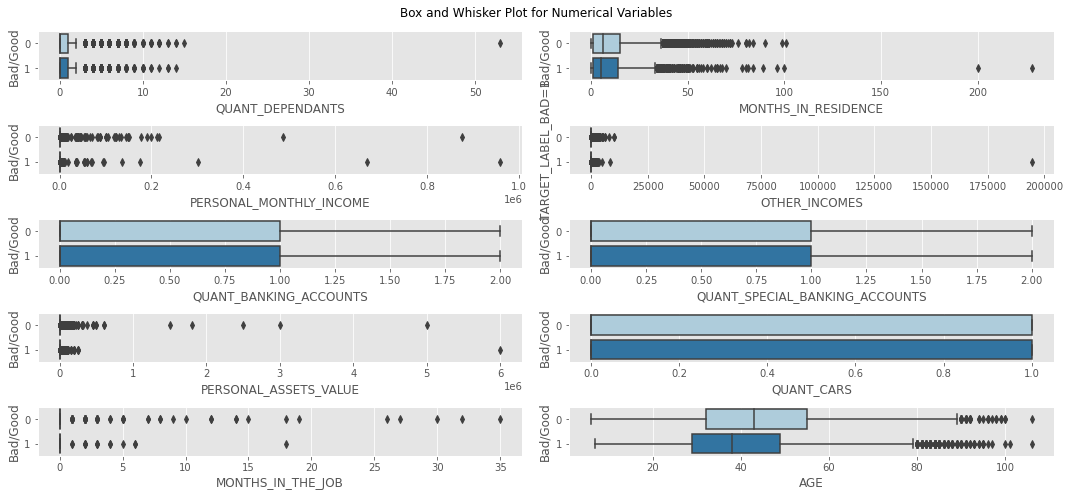

In [3]:
plt.style.use ('ggplot')
fig, axs = plt.subplots(5,2, figsize=(15,7))
plt.suptitle('Box and Whisker Plot for Numerical Variables')

plt.subplot (5, 2, 1)
chart1 = sns.boxplot(data=data, x="QUANT_DEPENDANTS", y='TARGET_LABEL_BAD=1', orient = 'h', palette = "Paired")
chart1.set(ylabel='Bad/Good')

plt.subplot (5, 2, 2)
chart2 = sns.boxplot(data=data, x="MONTHS_IN_RESIDENCE", y='TARGET_LABEL_BAD=1', orient = 'h', palette = "Paired")
chart2.set(ylabel='Bad/Good')

plt.subplot (5, 2, 3)
chart3 = sns.boxplot(data=data, x="PERSONAL_MONTHLY_INCOME",  y='TARGET_LABEL_BAD=1', orient = 'h', palette = "Paired")
chart3.set(ylabel='Bad/Good')

plt.subplot (5, 2, 4)
chart4 = sns.boxplot(data=data, x="OTHER_INCOMES",  y='TARGET_LABEL_BAD=1', orient = 'h', palette = "Paired")
chart3.set(ylabel='Bad/Good')

plt.subplot (5, 2, 5)
chart5 = sns.boxplot(data=data, x="QUANT_BANKING_ACCOUNTS",  y='TARGET_LABEL_BAD=1', orient = 'h', palette = "Paired")
chart5.set(ylabel='Bad/Good')

plt.subplot (5, 2, 6)
chart6 = sns.boxplot(data=data, x="QUANT_SPECIAL_BANKING_ACCOUNTS",  y='TARGET_LABEL_BAD=1', orient = 'h', palette = "Paired")
chart6.set(ylabel='Bad/Good')

plt.subplot (5, 2, 7)
chart7 = sns.boxplot(data=data, x="PERSONAL_ASSETS_VALUE",  y='TARGET_LABEL_BAD=1', orient = 'h', palette = "Paired")
chart7.set(ylabel='Bad/Good')

plt.subplot (5, 2, 8)
chart8 = sns.boxplot(data=data, x="QUANT_CARS",  y='TARGET_LABEL_BAD=1', orient = 'h', palette = "Paired")
chart8.set(ylabel='Bad/Good')

plt.subplot (5, 2, 9)
chart9 = sns.boxplot(data=data, x="MONTHS_IN_THE_JOB",  y='TARGET_LABEL_BAD=1', orient = 'h', palette = "Paired")
chart9.set(ylabel='Bad/Good')

plt.subplot (5, 2, 10)
chart10 = sns.boxplot(data=data, x="AGE",  y='TARGET_LABEL_BAD=1', orient = 'h', palette = "Paired")
chart10.set(ylabel='Bad/Good')

plt.tight_layout()
plt.savefig('Box and Whisker Plot for Numerical Variables.png')

## 3.2 Data Representation - Categorical Variables

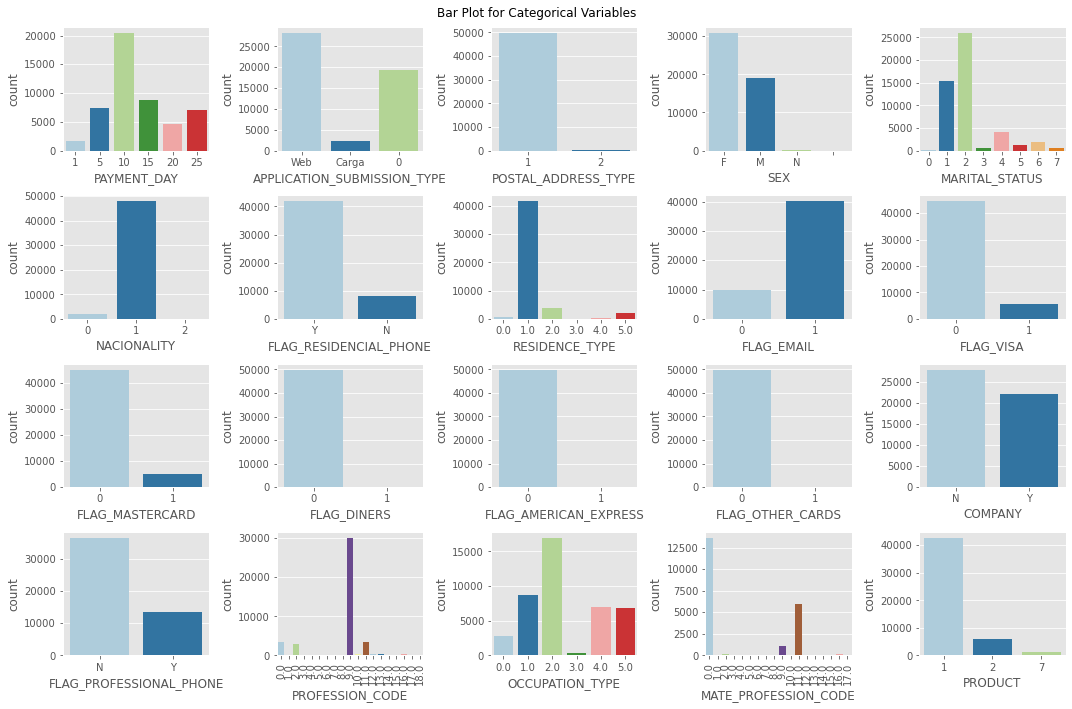

In [4]:
plt.style.use ('ggplot')
fig, axs = plt.subplots(4,5, figsize=(15,10))
plt.suptitle('Bar Plot for Categorical Variables')

chart1 = sns.countplot(data=data, x="PAYMENT_DAY", palette="Paired", ax=axs[0,0])
chart2 = sns.countplot(data=data, x="APPLICATION_SUBMISSION_TYPE", palette="Paired", ax=axs[0,1])
chart3 = sns.countplot(data=data, x="POSTAL_ADDRESS_TYPE", palette="Paired", ax=axs[0,2])
chart4 = sns.countplot(data=data, x="SEX", palette="Paired", ax=axs[0,3])
chart5 = sns.countplot(data=data, x="MARITAL_STATUS", palette="Paired", ax=axs[0,4])
chart6 = sns.countplot(data=data, x="NACIONALITY", palette="Paired", ax=axs[1,0])
chart7 = sns.countplot(data=data, x="FLAG_RESIDENCIAL_PHONE", palette="Paired", ax=axs[1,1])
chart8 = sns.countplot(data=data, x="RESIDENCE_TYPE", palette="Paired", ax=axs[1,2])
chart9 = sns.countplot(data=data, x="FLAG_EMAIL", palette="Paired", ax=axs[1,3])
chart10 = sns.countplot(data=data, x="FLAG_VISA", palette="Paired", ax=axs[1,4])
chart11 = sns.countplot(data=data, x="FLAG_MASTERCARD", palette="Paired", ax=axs[2,0])
chart12 = sns.countplot(data=data, x="FLAG_DINERS", palette="Paired", ax=axs[2,1])
chart13 = sns.countplot(data=data, x="FLAG_AMERICAN_EXPRESS", palette="Paired", ax=axs[2,2])
chart14 = sns.countplot(data=data, x="FLAG_OTHER_CARDS", palette="Paired", ax=axs[2,3])
chart15 = sns.countplot(data=data, x="COMPANY", palette="Paired", ax=axs[2,4])
chart16 = sns.countplot(data=data, x="FLAG_PROFESSIONAL_PHONE", palette="Paired", ax=axs[3,0])
chart17 = sns.countplot(data=data, x="PROFESSION_CODE", palette="Paired", ax=axs[3,1])
chart17.set_xticklabels(chart17.get_xticklabels(), rotation=90)
chart18 = sns.countplot(data=data, x="OCCUPATION_TYPE", palette="Paired", ax=axs[3,2])
chart19 = sns.countplot(data=data, x="MATE_PROFESSION_CODE", palette="Paired", ax=axs[3,3])
chart19.set_xticklabels(chart19.get_xticklabels(), rotation=90)
chart20 = sns.countplot(data=data, x="PRODUCT", palette="Paired", ax=axs[3,4])

plt.tight_layout()
plt.savefig('Bar Plot for Categorical Variables')

**Conclusion**

Based on two figures above, we found that there are a lot of missing values and wrong values in the dataset. Furthermore, some variables have a lot of irrelevant values (not aligned with Variables List Guidance), including:

- 'MONTHS_IN_THE_JOB': For column 'MONTHS_IN_THE_JOB', there are 49924 '0'    

- 'QUANT_BANKING_ACCOUNTS' and 'QUANT_SPECIAL_BANKING_ACCOUNTS' have the same value and dsitribution.

- 'SEX': 'N' is a wrong value

- 'RESIDENCE_TYPE': 0.0 is a wrong value

- 'MARITAL_STATUS': 0 is a wrong value

## 3.3 Data Representation - Missing Values

In [5]:
# There are two types of missing values: 'NULL' and 'EMPTY STRING'
# Checking Total Missing Values in dataset

missingvalues = data.isnull().sum()
missingvalues = pd.DataFrame (missingvalues, columns = ['Total Null Values'])
missingvalues.index.names = ['index']
missingvalues ['Total Blank Values'] = (data == ' ').sum()
missingvalues

,Total Null Values,Total Blank Values
index,,
ID_CLIENT,0,0
CLERK_TYPE,0,0
PAYMENT_DAY,0,0
APPLICATION_SUBMISSION_TYPE,0,0
QUANT_ADDITIONAL_CARDS,0,0
POSTAL_ADDRESS_TYPE,0,0
SEX,0,17
MARITAL_STATUS,0,0
QUANT_DEPENDANTS,0,0


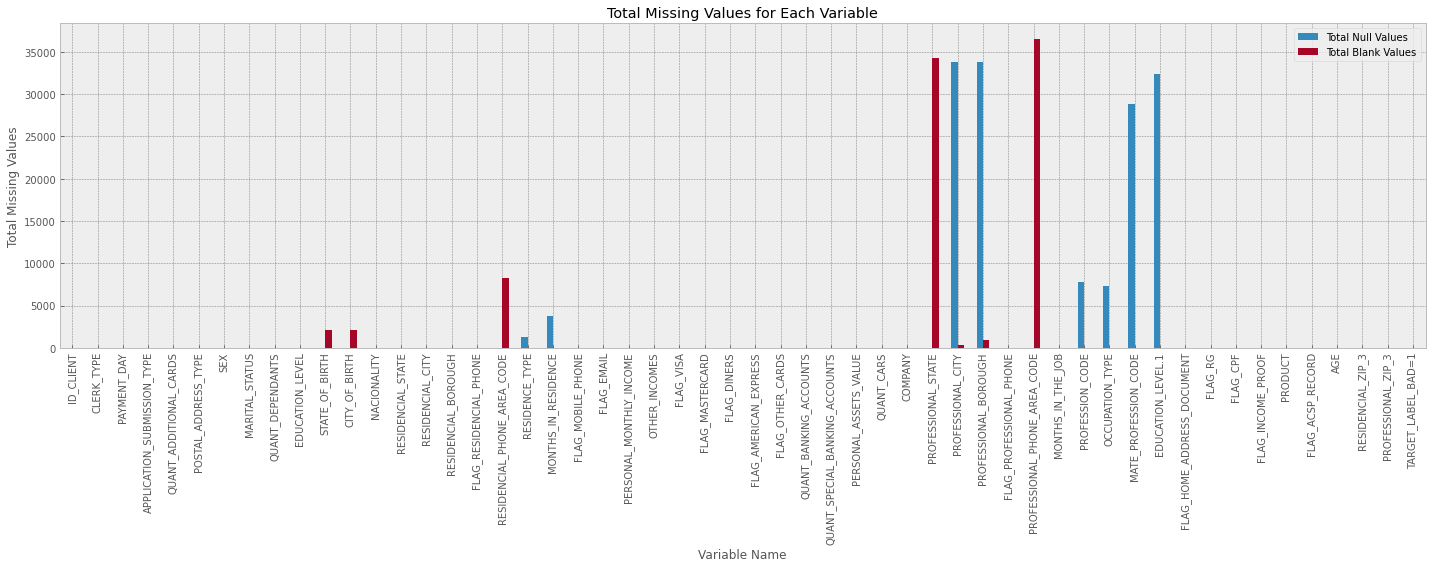

In [6]:
# Creating Plot table to visualise Missing Values
plt.style.use ('bmh')

missingvalues.plot (kind ='bar', figsize =(20,8),
                   title = 'Total Missing Values for Each Variable')

plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.xlabel('Variable Name')
plt.ylabel ('Total Missing Values')

plt.tight_layout()
plt.savefig('Total Missing Values for Each Variable')

# 4. Choosing Features (Feature Selection)

- Removing the columns that contain a lot of missing values.
- Removing the columns that have same values accross samples.

In [7]:
data_bank = data[['PAYMENT_DAY', 'POSTAL_ADDRESS_TYPE', 'SEX', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 
                  'NACIONALITY', 'RESIDENCIAL_STATE', 'FLAG_RESIDENCIAL_PHONE', 'RESIDENCE_TYPE', 
                  'MONTHS_IN_RESIDENCE', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 
                  'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 
                  'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS', 
                  'COMPANY', 'FLAG_PROFESSIONAL_PHONE', 'PRODUCT', 'AGE', 'TARGET_LABEL_BAD=1']].copy()

print('the number of chosen features:', len(data_bank.columns))
data_bank

the number of chosen features: 26


,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,...,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PRODUCT,AGE,TARGET_LABEL_BAD=1
0,5,1,F,6,1,1,RN,Y,1.0,15.0,...,0,0,0,0.0,0,N,N,1,32,1
1,15,1,F,2,0,1,RJ,Y,1.0,1.0,...,0,0,0,0.0,0,Y,N,1,34,1
2,5,1,F,2,0,1,RN,Y,1.0,NaN,...,0,0,0,0.0,0,N,N,1,27,0
3,20,1,F,2,0,1,PE,N,NaN,NaN,...,0,0,0,0.0,0,N,N,1,61,0
4,10,1,M,2,0,1,RJ,Y,1.0,12.0,...,0,0,0,0.0,0,N,N,1,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,10,1,F,1,2,1,RN,Y,1.0,14.0,...,0,0,1,0.0,1,N,N,1,36,1
49996,25,1,F,1,0,1,SP,Y,1.0,15.0,...,0,0,0,0.0,0,N,N,2,21,0
49997,5,1,M,2,3,1,SP,Y,2.0,5.0,...,0,0,0,0.0,0,Y,Y,1,41,0
49998,1,1,F,1,1,1,MG,Y,1.0,NaN,...,0,0,0,0.0,0,Y,Y,1,28,1


# 5. Data Pre-Processing

## 5.1 Removing Wrong (Irrelevant) values

- In column 'SEX', 'N' is not a correct value

- In column 'RESIDENCE_TYPE', 0.0 is not a correct value
  for column 'RESIDENCE_TYPE', replace 0.0 with NAN first, then using mode to fill all null values

- In column 'MARITAL_STATUS', 0 is a wrong value
  for column 'MARITAL_STATUS', replace 0.0 with NAN first, then use dropna() to delete these wrong values.
    
We applied 'Mode' to fill null values for column 'RESIDENCE_TYPE'. However, we applied dropna() to remove wrong values for column 'MARITAL_STATUS'. The reason for this is that there are more wrong values in column 'RESIDENCE_TYPE'(757 wrong values in column 'RESIDENCE_TYPE', 202 wrong values in column 'MARITAL_STATUS'), and we did not want to lose too many samples and information.

### 5.1.1 Removing Wrong (Irrelevant) Values in variable 'SEX'

In [8]:
print('Before cleaning:\n', data_bank['SEX'].value_counts())

for index, row in data_bank.iterrows():
    if row['SEX'] == 'N':     # the index will not change;df.reset_index(drop=True)  can reset the index
        data_bank = data_bank.drop(index, axis = 0)
data_bank = data_bank.reset_index(drop=True)    # reset the indexes

print('After cleaning:\n', data_bank['SEX'].value_counts())

Before cleaning:
 F    30805
M    19130
N       48
        17
Name: SEX, dtype: int64
After cleaning:
 F    30805
M    19130
        17
Name: SEX, dtype: int64


### 5.1.2 Replacing 0.0 with null value in the variable 'RESIDENCE_TYPE'

In [9]:
print('Before cleaning:\n', data_bank['RESIDENCE_TYPE'].value_counts())
# just remove or 

for index, row in data_bank.iterrows():
    if row['RESIDENCE_TYPE'] == 0.0:     # the index will not change;df.reset_index(drop=True)  can reset the index
        data_bank['RESIDENCE_TYPE'].iloc[index] = None
data_bank = data_bank.reset_index(drop=True)    # reset the indexes

print('After cleaning:\n', data_bank['RESIDENCE_TYPE'].value_counts())

Before cleaning:
 1.0    41531
2.0     3882
5.0     1981
0.0      757
4.0      311
3.0      141
Name: RESIDENCE_TYPE, dtype: int64


/tmp/ipykernel_320/597276429.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bank['RESIDENCE_TYPE'].iloc[index] = None


After cleaning:
 1.0    41531
2.0     3882
5.0     1981
4.0      311
3.0      141
Name: RESIDENCE_TYPE, dtype: int64


### 5.1.3 Replacing 0 with null value in the variable 'MARITAL_STATUS'

In [10]:
print('Before cleaning:\n', data_bank['MARITAL_STATUS'].value_counts())
# just remove or 

for index, row in data_bank.iterrows():
    if row['MARITAL_STATUS'] == 0:     # the index will not change;df.reset_index(drop=True)  can reset the index
        data_bank['MARITAL_STATUS'].iloc[index] = None
data_bank = data_bank.reset_index(drop=True)    # reset the indexes

print('After cleaning:\n', data_bank['MARITAL_STATUS'].value_counts())

Before cleaning:
 2    25939
1    15276
4     4202
6     1875
5     1294
3      632
7      534
0      200
Name: MARITAL_STATUS, dtype: int64


/tmp/ipykernel_320/1542201594.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bank['MARITAL_STATUS'].iloc[index] = None


After cleaning:
 2.0    25939
1.0    15276
4.0     4202
6.0     1875
5.0     1294
3.0      632
7.0      534
Name: MARITAL_STATUS, dtype: int64


## 5.2 Missing values

- Filling missing values(if there are more than 300 null values in the column):
    - 'RESIDENCE_TYPE': 757
    - 'MONTHS_IN_RESIDENCE': 3777
    
- Removing missing values(if there are less than 300 null values in the column):
    - 'MARITAL_STATUS': 20  
    - 'SEX': 17

### 5.2.1 Using KNNImputer to fill null values in 'MONTHS_IN_RESIDENCE' column (numerical variable)

In [11]:
imputer = KNNImputer(n_neighbors = 5)

# Checking total number of missing values before imputation
print('The number of missing values before imputation: ', data_bank['MONTHS_IN_RESIDENCE'].isna().sum())

data_bank['MONTHS_IN_RESIDENCE'] = imputer.fit_transform(data_bank[['MONTHS_IN_RESIDENCE', 'TARGET_LABEL_BAD=1']])

# Checking total number of missing values after imputation
print('The number of missing values after imputation: ', data_bank['MONTHS_IN_RESIDENCE'].isna().sum())

The number of missing values before imputation:  3777
The number of missing values after imputation:  0


### 5.2.2 Using mode to fill null values in 'RESIDENCE_TYPE' column

In [12]:
print('The number of missing values before filling: ', data_bank['RESIDENCE_TYPE'].isna().sum())

data_bank['RESIDENCE_TYPE'] = data_bank['RESIDENCE_TYPE'].fillna(data_bank['RESIDENCE_TYPE'].mode()[0])

print('The number of missing values after filling: ', data_bank['RESIDENCE_TYPE'].isna().sum())

print(data_bank['RESIDENCE_TYPE'].value_counts())

The number of missing values before filling:  2106
The number of missing values after filling:  0
1.0    43637
2.0     3882
5.0     1981
4.0      311
3.0      141
Name: RESIDENCE_TYPE, dtype: int64


### 5.3.1 Removing Missing Values

In [13]:
# Delete All NaN - Delete instance with NaN values
data_bank_withoutna = data_bank.dropna()

# missing values in 'SEX' and 'STATE_OF_BIRTH' columns haven't been removed, so we need to remove them seperately
for index, row in data_bank_withoutna.iterrows():
    if row['SEX'].isspace() != 0:
        data_bank_withoutna = data_bank_withoutna.drop(index, axis = 0)
data_bank_withoutna = data_bank_withoutna.reset_index(drop=True)    # reset the indexes 

# display the data 
data_bank_withoutna

,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,...,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PRODUCT,AGE,TARGET_LABEL_BAD=1
0,5,1,F,6.0,1,1,RN,Y,1.0,15.0,...,0,0,0,0.0,0,N,N,1,32,1
1,15,1,F,2.0,0,1,RJ,Y,1.0,1.0,...,0,0,0,0.0,0,Y,N,1,34,1
2,5,1,F,2.0,0,1,RN,Y,1.0,17.6,...,0,0,0,0.0,0,N,N,1,27,0
3,20,1,F,2.0,0,1,PE,N,1.0,17.6,...,0,0,0,0.0,0,N,N,1,61,0
4,10,1,M,2.0,0,1,RJ,Y,1.0,12.0,...,0,0,0,0.0,0,N,N,1,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49730,10,1,F,1.0,2,1,RN,Y,1.0,14.0,...,0,0,1,0.0,1,N,N,1,36,1
49731,25,1,F,1.0,0,1,SP,Y,1.0,15.0,...,0,0,0,0.0,0,N,N,2,21,0
49732,5,1,M,2.0,3,1,SP,Y,2.0,5.0,...,0,0,0,0.0,0,Y,Y,1,41,0
49733,1,1,F,1.0,1,1,MG,Y,1.0,5.2,...,0,0,0,0.0,0,Y,Y,1,28,1


## 5.3 Treating Each Type of Data Separately

**1. For Categorical Dataset:**
- Replacing Y/N into 1/0 for FLAG_RESIDENCIAL_PHONE, COMPANY, FLAG_PROFESSIONAL_PHONE to align with other Binary variable format.
- Convert Type: convert 'int64' or 'float' into 'object' for categorical variables.
- One-Hot Encoding: to overcome categorical values.

**2. Outlier Detection**
- Outlier Detection for numerical variables with Isolation Forest technique.

**3. For Numerical Dataset:**
- Normalisation using Min-Max Scaling.
- Principal Component Analysis (PCA).

**4. Balancing Dependent Variables:**
- SMOTE.

## 5.3.1 For Categorical Variables



### Replacing Y/N into 1/0 for FLAG_RESIDENCIAL_PHONE, COMPANY, FLAG_PROFESSIONAL_PHONE

In [14]:
data_bank_withoutna['FLAG_RESIDENCIAL_PHONE'] = data_bank_withoutna['FLAG_RESIDENCIAL_PHONE'].map({'Y': 1, 'N': 0})
data_bank_withoutna['COMPANY'] = data_bank_withoutna['COMPANY'].map({'Y': 1, 'N': 0})
data_bank_withoutna['FLAG_PROFESSIONAL_PHONE'] = data_bank_withoutna['FLAG_PROFESSIONAL_PHONE'].map({'Y': 1, 'N': 0})

data_bank_withoutna

,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,...,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PRODUCT,AGE,TARGET_LABEL_BAD=1
0,5,1,F,6.0,1,1,RN,1,1.0,15.0,...,0,0,0,0.0,0,0,0,1,32,1
1,15,1,F,2.0,0,1,RJ,1,1.0,1.0,...,0,0,0,0.0,0,1,0,1,34,1
2,5,1,F,2.0,0,1,RN,1,1.0,17.6,...,0,0,0,0.0,0,0,0,1,27,0
3,20,1,F,2.0,0,1,PE,0,1.0,17.6,...,0,0,0,0.0,0,0,0,1,61,0
4,10,1,M,2.0,0,1,RJ,1,1.0,12.0,...,0,0,0,0.0,0,0,0,1,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49730,10,1,F,1.0,2,1,RN,1,1.0,14.0,...,0,0,1,0.0,1,0,0,1,36,1
49731,25,1,F,1.0,0,1,SP,1,1.0,15.0,...,0,0,0,0.0,0,0,0,2,21,0
49732,5,1,M,2.0,3,1,SP,1,2.0,5.0,...,0,0,0,0.0,0,1,1,1,41,0
49733,1,1,F,1.0,1,1,MG,1,1.0,5.2,...,0,0,0,0.0,0,1,1,1,28,1


### Convert 'int64' into 'object' for Categorical Variables

In [15]:
data_bank_withoutna['PAYMENT_DAY'] = data_bank_withoutna['PAYMENT_DAY'].astype('string',copy = False)
data_bank_withoutna['POSTAL_ADDRESS_TYPE'] = data_bank_withoutna['POSTAL_ADDRESS_TYPE'].astype('string',copy = False)
data_bank_withoutna['MARITAL_STATUS'] = data_bank_withoutna['MARITAL_STATUS'].astype('string',copy = False)
data_bank_withoutna['NACIONALITY'] = data_bank_withoutna['NACIONALITY'].astype('string',copy = False)
data_bank_withoutna['RESIDENCE_TYPE'] = data_bank_withoutna['RESIDENCE_TYPE'].astype('string',copy = False)
data_bank_withoutna['PRODUCT'] = data_bank_withoutna['PRODUCT'].astype('string',copy = False)

# Change to Uint8 because the data is already binary
data_bank_withoutna['FLAG_EMAIL'] = data_bank_withoutna['FLAG_EMAIL'].astype('uint8',copy = False)
data_bank_withoutna['FLAG_VISA'] = data_bank_withoutna['FLAG_VISA'].astype('uint8',copy = False)
data_bank_withoutna['FLAG_MASTERCARD'] = data_bank_withoutna['FLAG_MASTERCARD'].astype('uint8',copy = False)
data_bank_withoutna['FLAG_DINERS'] = data_bank_withoutna['FLAG_DINERS'].astype('uint8',copy = False)
data_bank_withoutna['FLAG_AMERICAN_EXPRESS'] = data_bank_withoutna['FLAG_AMERICAN_EXPRESS'].astype('uint8',copy = False)
data_bank_withoutna['FLAG_OTHER_CARDS'] = data_bank_withoutna['FLAG_OTHER_CARDS'].astype('uint8',copy = False)

data_bank_withoutna

,PAYMENT_DAY,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,...,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PRODUCT,AGE,TARGET_LABEL_BAD=1
0,5,1,F,6.0,1,1,RN,1,1.0,15.0,...,0,0,0,0.0,0,0,0,1,32,1
1,15,1,F,2.0,0,1,RJ,1,1.0,1.0,...,0,0,0,0.0,0,1,0,1,34,1
2,5,1,F,2.0,0,1,RN,1,1.0,17.6,...,0,0,0,0.0,0,0,0,1,27,0
3,20,1,F,2.0,0,1,PE,0,1.0,17.6,...,0,0,0,0.0,0,0,0,1,61,0
4,10,1,M,2.0,0,1,RJ,1,1.0,12.0,...,0,0,0,0.0,0,0,0,1,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49730,10,1,F,1.0,2,1,RN,1,1.0,14.0,...,0,0,1,0.0,1,0,0,1,36,1
49731,25,1,F,1.0,0,1,SP,1,1.0,15.0,...,0,0,0,0.0,0,0,0,2,21,0
49732,5,1,M,2.0,3,1,SP,1,2.0,5.0,...,0,0,0,0.0,0,1,1,1,41,0
49733,1,1,F,1.0,1,1,MG,1,1.0,5.2,...,0,0,0,0.0,0,1,1,1,28,1


### One Hot Encoding - To overcome categorical values

In [16]:
# column 'TARGET_LABEL_BAD=1' do not need to be encoded, it is label
data_bank_withoutna_one_hot = pd.get_dummies(data_bank_withoutna, columns = ['PAYMENT_DAY', 
                                            'POSTAL_ADDRESS_TYPE', 'SEX', 'MARITAL_STATUS', 
                                            'NACIONALITY', 'RESIDENCIAL_STATE', 
                                            'RESIDENCE_TYPE', 'PRODUCT'])

data_bank_withoutna_one_hot

,QUANT_DEPENDANTS,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,...,RESIDENCIAL_STATE_SP,RESIDENCIAL_STATE_TO,RESIDENCE_TYPE_1.0,RESIDENCE_TYPE_2.0,RESIDENCE_TYPE_3.0,RESIDENCE_TYPE_4.0,RESIDENCE_TYPE_5.0,PRODUCT_1,PRODUCT_2,PRODUCT_7
0,1,1,15.0,1,900.00,0.0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,1,1.0,1,750.00,0.0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,1,17.6,1,500.00,0.0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,17.6,1,500.00,0.0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,1,12.0,1,1200.00,0.0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49730,2,1,14.0,1,1451.00,0.0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
49731,0,1,15.0,1,450.00,0.0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
49732,3,1,5.0,1,1555.00,0.0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
49733,1,1,5.2,1,1443.27,0.0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


## 5.3.2 Outlier Detection



In [17]:
# Splitting X (Independent Variables) and Y (Dependent Variables)
# Outlier Detection is only for Independent variables

independent_variables = data_bank_withoutna_one_hot.drop(['TARGET_LABEL_BAD=1'], axis=1).copy()
dependent_variables = data_bank_withoutna_one_hot['TARGET_LABEL_BAD=1'].copy()

In [18]:
# Detecting outliers using Isolation Forest

loc= IsolationForest(contamination=0.1)
outliers_loc = loc.fit_predict(independent_variables)
independent_variables['outlier_lof'] = pd.DataFrame(outliers_loc)

print(independent_variables['outlier_lof'].value_counts())
print(independent_variables.shape)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


 1    44761
-1     4974
Name: outlier_lof, dtype: int64
(49735, 73)


In [19]:
# Rejoining X (Independent Variables) and Y (Dependent Variables)
data_processed = independent_variables.join(dependent_variables)

In [20]:
# Deleting Outliers from dataset
data_processed_non_outlier = data_processed.loc[data_processed["outlier_lof"] == 1 ]

data_processed_non_outlier = data_processed_non_outlier.reset_index(drop=True) # reset the indexes

data_processed_non_outlier

,QUANT_DEPENDANTS,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,...,RESIDENCE_TYPE_1.0,RESIDENCE_TYPE_2.0,RESIDENCE_TYPE_3.0,RESIDENCE_TYPE_4.0,RESIDENCE_TYPE_5.0,PRODUCT_1,PRODUCT_2,PRODUCT_7,outlier_lof,TARGET_LABEL_BAD=1
0,1,1,15.0,1,900.00,0.0,1,1,0,0,...,1,0,0,0,0,1,0,0,1,1
1,0,1,1.0,1,750.00,0.0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
2,0,1,17.6,1,500.00,0.0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,0,0,17.6,1,500.00,0.0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0,1,12.0,1,1200.00,0.0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44756,2,1,14.0,1,1451.00,0.0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
44757,0,1,15.0,1,450.00,0.0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
44758,3,1,5.0,1,1555.00,0.0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
44759,1,1,5.2,1,1443.27,0.0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1


In [21]:
# Deleting Outliers Flag Column
data_processed_non_outlier = data_processed_non_outlier.drop(['outlier_lof'], axis=1)

## 5.3.3 For Numerical Variables

- Normalisation: In this experiments, we applied Min-Max Scaling.
- Principal Component Analysis (PCA)

### Split data into two datasets: numerical dataset and categorical dataset

In [22]:
# Numerical Dataset
numerical_dataset = data_processed_non_outlier[['QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE', 
                                         'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 
                                         'QUANT_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE',  
                                         'QUANT_CARS', 'AGE']].copy()

# Categorical Dataset
categorical_dataset = data_processed_non_outlier.drop(['QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE', 
                                         'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 
                                         'QUANT_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE',  
                                         'QUANT_CARS', 'AGE'], axis=1).copy()

### Normalisation using Min-Max Scaling

In [23]:
# Normalisation
mms = MinMaxScaler()
numerical_dataset_norm = mms.fit_transform(numerical_dataset)
numerical_dataset_norm = pd.DataFrame(data = numerical_dataset_norm, columns = numerical_dataset.columns)

numerical_dataset_norm

,QUANT_DEPENDANTS,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,QUANT_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,AGE
0,0.018868,0.065789,0.000876,0.0,0.0,0.0,0.0,0.252525
1,0.000000,0.004386,0.000720,0.0,0.0,0.0,0.0,0.272727
2,0.000000,0.077193,0.000459,0.0,0.0,0.0,0.0,0.202020
3,0.000000,0.077193,0.000459,0.0,0.0,0.0,0.0,0.545455
4,0.000000,0.052632,0.001189,0.0,0.0,0.0,0.0,0.414141
...,...,...,...,...,...,...,...,...
44756,0.037736,0.061404,0.001451,0.0,0.5,0.0,1.0,0.292929
44757,0.000000,0.065789,0.000407,0.0,0.0,0.0,0.0,0.141414
44758,0.056604,0.021930,0.001559,0.0,0.0,0.0,0.0,0.343434
44759,0.018868,0.022807,0.001442,0.0,0.0,0.0,0.0,0.212121


### Principal Component Analysis (PCA)

PCA was applied to reduce dimension of features or overcome multicollinearity across predictors.

In [24]:
# Dimensionality Reduction - PCA
pca = PCA(n_components='mle')
numerical_dataset_norm_PCA = pd.DataFrame(pca.fit_transform(numerical_dataset_norm))

# convert 'int' into 'str' for new column names
numerical_dataset_norm_PCA.columns = numerical_dataset_norm_PCA.columns.map(lambda x: str(x))

numerical_dataset_norm_PCA

,0,1,2,3,4,5,6
0,-0.340792,-0.109578,-0.018082,0.026520,0.007261,-0.000538,0.000139
1,-0.340386,-0.093640,-0.018011,-0.035800,-0.012648,-0.000297,0.000054
2,-0.341225,-0.159018,-0.017419,0.041814,-0.011661,-0.000517,-0.000252
3,-0.338635,0.183495,-0.022993,0.017501,-0.009814,-0.000597,-0.000351
4,-0.339522,0.050800,-0.020673,0.002303,-0.010981,-0.000472,0.000439
...,...,...,...,...,...,...,...
44756,0.777178,-0.077325,0.009459,0.024402,0.025925,-0.000779,0.000619
44757,-0.341635,-0.220266,-0.016349,0.034732,-0.012201,-0.000468,-0.000276
44758,-0.339912,-0.022260,-0.019082,-0.024348,0.044655,-0.000515,0.000792
44759,-0.340916,-0.152908,-0.017097,-0.013484,0.006237,-0.000379,0.000756


### Splicing (joining) the categorical dataset and numerical dataset

In [25]:
# Rejoining Numerical and Categorical Variables(the numerical dataset with PCA)
data_processed_2 = numerical_dataset_norm_PCA.join(categorical_dataset)

data_processed_2

,0,1,2,3,4,5,6,FLAG_RESIDENCIAL_PHONE,FLAG_EMAIL,FLAG_VISA,...,RESIDENCIAL_STATE_TO,RESIDENCE_TYPE_1.0,RESIDENCE_TYPE_2.0,RESIDENCE_TYPE_3.0,RESIDENCE_TYPE_4.0,RESIDENCE_TYPE_5.0,PRODUCT_1,PRODUCT_2,PRODUCT_7,TARGET_LABEL_BAD=1
0,-0.340792,-0.109578,-0.018082,0.026520,0.007261,-0.000538,0.000139,1,1,1,...,0,1,0,0,0,0,1,0,0,1
1,-0.340386,-0.093640,-0.018011,-0.035800,-0.012648,-0.000297,0.000054,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,-0.341225,-0.159018,-0.017419,0.041814,-0.011661,-0.000517,-0.000252,1,1,0,...,0,1,0,0,0,0,1,0,0,0
3,-0.338635,0.183495,-0.022993,0.017501,-0.009814,-0.000597,-0.000351,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,-0.339522,0.050800,-0.020673,0.002303,-0.010981,-0.000472,0.000439,1,1,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44756,0.777178,-0.077325,0.009459,0.024402,0.025925,-0.000779,0.000619,1,1,0,...,0,1,0,0,0,0,1,0,0,1
44757,-0.341635,-0.220266,-0.016349,0.034732,-0.012201,-0.000468,-0.000276,1,1,0,...,0,1,0,0,0,0,0,1,0,0
44758,-0.339912,-0.022260,-0.019082,-0.024348,0.044655,-0.000515,0.000792,1,1,0,...,0,0,1,0,0,0,1,0,0,0
44759,-0.340916,-0.152908,-0.017097,-0.013484,0.006237,-0.000379,0.000756,1,1,0,...,0,1,0,0,0,0,1,0,0,1


the following dataset is the dataset without PCA, so that we can use this dataset in lasso logistic regression to better understand the coefficients of features.

In [26]:
# Rejoining Numerical and Categorical Variables(the numerical dataset without PCA)
data_processed_withoutPCA = numerical_dataset_norm.join(categorical_dataset)

data_processed_withoutPCA


,QUANT_DEPENDANTS,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,QUANT_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,AGE,FLAG_RESIDENCIAL_PHONE,FLAG_EMAIL,...,RESIDENCIAL_STATE_TO,RESIDENCE_TYPE_1.0,RESIDENCE_TYPE_2.0,RESIDENCE_TYPE_3.0,RESIDENCE_TYPE_4.0,RESIDENCE_TYPE_5.0,PRODUCT_1,PRODUCT_2,PRODUCT_7,TARGET_LABEL_BAD=1
0,0.018868,0.065789,0.000876,0.0,0.0,0.0,0.0,0.252525,1,1,...,0,1,0,0,0,0,1,0,0,1
1,0.000000,0.004386,0.000720,0.0,0.0,0.0,0.0,0.272727,1,1,...,0,1,0,0,0,0,1,0,0,1
2,0.000000,0.077193,0.000459,0.0,0.0,0.0,0.0,0.202020,1,1,...,0,1,0,0,0,0,1,0,0,0
3,0.000000,0.077193,0.000459,0.0,0.0,0.0,0.0,0.545455,0,1,...,0,1,0,0,0,0,1,0,0,0
4,0.000000,0.052632,0.001189,0.0,0.0,0.0,0.0,0.414141,1,1,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44756,0.037736,0.061404,0.001451,0.0,0.5,0.0,1.0,0.292929,1,1,...,0,1,0,0,0,0,1,0,0,1
44757,0.000000,0.065789,0.000407,0.0,0.0,0.0,0.0,0.141414,1,1,...,0,1,0,0,0,0,0,1,0,0
44758,0.056604,0.021930,0.001559,0.0,0.0,0.0,0.0,0.343434,1,1,...,0,0,1,0,0,0,1,0,0,0
44759,0.018868,0.022807,0.001442,0.0,0.0,0.0,0.0,0.212121,1,1,...,0,1,0,0,0,0,1,0,0,1


In [27]:
data_processed_2.to_csv ('data_processed_2.csv')
data_processed_withoutPCA.to_csv('data_processed_withoutPCA.csv')

## 5.4 Splitting between Dependent and Independent Variables

In [28]:
# Spliting between Dependent and Independent Variables for Classification Model.
# dataset with PCA
X = data_processed_2.drop(['TARGET_LABEL_BAD=1'], axis=1).copy()
Y = data_processed_2['TARGET_LABEL_BAD=1'].copy()
Y = pd.DataFrame(Y)


# dataset without PCA
X_withoutPCA = data_processed_withoutPCA.drop(['TARGET_LABEL_BAD=1'], axis=1).copy()
Y_withoutPCA = data_processed_withoutPCA['TARGET_LABEL_BAD=1'].copy()
Y_withoutPCA = pd.DataFrame(Y_withoutPCA)



print(X.shape)
print(Y.shape)

(44761, 71)
(44761, 1)


## 5.5 SMOTE (Synthetic Minority Oversampling Technique)

SMOTE technique was applied to balance the dependent variables in the dataset.

In [29]:
# Checking whether there is an imbalance in classes
Y.value_counts()

TARGET_LABEL_BAD=1
0                     33220
1                     11541
dtype: int64

Based on the output, we found that there are 11480 '1' (Bad Customers) and 33281 '0' (Good Customers) in the column 'TARGET_LABEL_BAD=1'. It indicates an imbalance dependent variables (one or more classes have very low proportions in the training data as compared to the other classes).

As we all know, the relative frequencies of the classes can have a significant impact on the effectiveness of the model, so we apply SMOTE to overcome the class imbalance.

In [30]:
# SMOTE Process - To balanced the dependent variables
# dataset with PCA
sm = SMOTE()
X_sm, Y_sm = sm.fit_resample(X, Y)
X_sm = pd.DataFrame(X_sm,columns= X.columns)


# dataset without PCA
sm2 = SMOTE()
X_sm_withoutPCA, Y_sm_withoutPCA = sm2.fit_resample(X_withoutPCA, Y_withoutPCA)
X_sm_withoutPCA = pd.DataFrame(X_sm_withoutPCA,columns= X_withoutPCA.columns)

print(X_sm.shape)

(66440, 71)


# 6. Classification Models

## 6.1. Splitting dataset into training dataset and test dataset

In [31]:
# Splitting Data Training and Testing
# dataset with PCA
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size=0.3,random_state=100)


# dataset without PCA
X_train_withoutPCA, X_test_withoutPCA, Y_train_withoutPCA, Y_test_withoutPCA = train_test_split(X_sm_withoutPCA, Y_sm_withoutPCA, test_size=0.3,random_state=100)



print(X_train.shape)
print(X_test.shape)

(46508, 71)
(19932, 71)


We applied these dictionaries to store all evalaution indexes

In [32]:
# Storing evaluation indexes for all models, then we can visualise on the graph.
dist_evaluation = {'Train Accuracy':{}, 'Test Accuracy':{}, 'Precision':{}, 'Recall':{}}

# Storeing fpr, tpr for all models, so that we can draw a graph that contains ROC curves for all the models.
fprs = {}
tprs = {}

## 6.2 Model evaluation

Calculating the Accuracy, Precision, Recall, and AUC on train dataset. By comparing those metrics, we are able to know the performance of each model in several perspectives.

### 6.2.1 Accuracy, RMSE, AUC, Confusion Matrix, Precision, Recall

In [33]:
def Model_Evaluation(model_name, prediction_train, prediction_test, label_train, label_test):
    # -------calculating various evaluation indexes------
    # accuracy
    Train_Accuracy = accuracy(label_train, prediction_train)
    Test_Accuracy = accuracy(label_test, prediction_test)
    print("Train Accuracy: ", Train_Accuracy)
    print("Test Accuracy: ", Test_Accuracy)
    
    # RMSE
    rmse_test = sqrt(mse(label_test, prediction_test))
    print('Test RMSE: ', rmse_test)
    
    # AUC: range(0.5,1.0), the closer the AUC value is to 1.0, the higher the model accuracy.
    print('Test AUC:', roc_auc_score(label_test, prediction_test))
    
    # Confusion Matrix
    print("Test Confusion Matrix: \n"+str(cm(label_test, prediction_test)))   
     
    # precision score
    Precision = precision_score(label_test.astype(np.int64), prediction_test.astype(np.int64))
    print('Test precision score:', Precision)
    
    # recall score
    Recall = recall_score(label_test.astype(np.int64), prediction_test.astype(np.int64))
    print('Test recall score:', Recall)
        
    fpr, tpr, thresholds = roc(label_test.astype(np.int64), prediction_test.astype(np.int64))
    
    # -------adding needed evaluation indexes into dist_evaluation------
    dist_evaluation['Train Accuracy'][model_name] = Train_Accuracy
    dist_evaluation['Test Accuracy'][model_name] = Test_Accuracy
    dist_evaluation['Precision'][model_name] = Precision
    dist_evaluation['Recall'][model_name] = Recall
    
    
    # -------adding fpr and tpr for drawing ROC Curve
    fprs[model_name] = fpr
    tprs[model_name] = tpr
    

## 6.3 Logistic Regression

### 6.3.1 Logistic Regression

In [34]:
def Logistic_Regression(X_train, X_test, Y_train, Y_test):
    lr_clf = LogisticRegression()
    lr_clf = lr_clf.fit(X_train, Y_train)
    
    print('the weight of Logistic Regression:\n', lr_clf.coef_,'\n')
    print('the intercept(w0) of Logistic Regression:', lr_clf.intercept_,'\n')
    
    prediction_train = lr_clf.predict(X_train)
    prediction_test = lr_clf.predict(X_test)   
    
    return prediction_train, prediction_test

In [35]:
LR_prediction_train, LR_prediction_test = Logistic_Regression(X_train, X_test, Y_train, Y_test)

# Evaluation for the logistic regression model
print('\n\n --------Evaluation for the logistic regression model-------- \n')
Model_Evaluation('Logistic Regression', LR_prediction_train, LR_prediction_test, np.array(Y_train), np.array(Y_test))

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


the weight of Logistic Regression:
 [[-1.66217121e-01 -2.81889061e+00  1.73609365e-01 -2.49130889e+00
   1.79251369e+00 -6.22590498e-01  5.23633171e-01 -8.41951458e-01
  -2.42512503e-01 -3.94546168e-01 -6.34030572e-01  3.90498073e-01
   2.07429962e-01 -6.10188947e-01 -2.86597464e-01 -2.10735315e-01
  -3.66713746e+00 -3.39152858e+00 -3.31034850e+00 -3.30305079e+00
  -3.08174006e+00 -3.50370557e+00  2.41644794e-04  2.56570740e-03
  -3.11087842e+00 -2.90245737e+00 -3.07704159e+00 -3.40243733e+00
  -4.09735512e+00 -3.40863465e+00 -3.53875232e+00 -3.57246017e+00
  -3.60807117e+00 -2.12560424e+00 -1.84895045e+00 -2.02599457e+00
  -3.79745773e+00 -3.48967570e+00 -3.42561143e+00 -4.36817445e+00
  -3.51061895e+00 -3.40480967e+00 -3.53496634e+00 -3.95596013e+00
  -3.78786642e+00 -3.98042395e+00 -3.68880196e+00 -3.76428575e+00
  -3.75375579e+00 -3.81188921e+00 -3.85408213e+00 -3.44617453e+00
  -4.06786532e+00 -3.94344741e+00 -3.36952181e+00 -3.61071674e+00
  -4.87247725e+00 -3.86994295e+00 -3.655

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 5.3.2 Logistic Regression with Cross Validation (CV)

In [36]:
def Logistic_Regression_cv(X_train, X_test, Y_train, Y_test):
    lr_clf_cv = LogisticRegressionCV(cv=5, random_state = 10)
    lr_clf_cv = lr_clf_cv.fit(X_train, Y_train)
    
    print('the weight of Logistic Regression:\n', lr_clf_cv.coef_,'\n')
    print('the intercept(w0) of Logistic Regression:', lr_clf_cv.intercept_,'\n')
    
    prediction_train = lr_clf_cv.predict(X_train)
    prediction_test = lr_clf_cv.predict(X_test)   
    
    return prediction_train, prediction_test

In [37]:
LR_cv_prediction_train, LR_cv_prediction_test = Logistic_Regression_cv(X_train, X_test, Y_train, Y_test)

# Evaluation for the logistic regression model
print('\n\n --------Evaluation for the logistic regression model-------- \n')
Model_Evaluation('Logistic Regression with cross validation', LR_cv_prediction_train, LR_cv_prediction_test, np.array(Y_train), np.array(Y_test))

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or

the weight of Logistic Regression:
 [[-0.15162099 -2.79973642  0.11893998 -2.56568503  1.58269847 -6.52397904
   2.44380672 -0.83863814 -0.21882366 -0.37262698 -0.68471522  0.3556652
   0.24350915 -0.77434085 -0.27646409 -0.21973594 -7.41804939 -7.10275791
  -7.03030181 -7.02916009 -6.79304106 -7.23171582 -3.90532712 -4.81810599
  -6.86975315 -6.67032473 -6.69703507 -6.99981471 -7.89466074 -7.04099644
  -7.14626294 -7.23940161 -7.33231933 -5.37357133 -4.81629255 -5.99804944
  -7.51453209 -7.04472771 -7.08393991 -8.0138989  -7.0824452  -6.99651803
  -7.17740792 -7.53230976 -7.34852567 -7.55922377 -7.25301263 -7.44331333
  -7.30780996 -7.36566153 -7.47858945 -7.03817803 -7.73653466 -7.5881384
  -6.95569189 -7.2045613  -8.39152623 -7.43255662 -7.22204864 -8.06170392
  -6.96934807 -7.0365155  -7.88120872 -6.28900976 -6.59762228 -7.17576526
  -7.48255733 -7.05223443 -5.99458351 -6.40462114 -6.42863371]] 

the intercept(w0) of Logistic Regression: [49.86655533] 



 --------Evaluation for th

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 6.4 Lasso Logistic Regression

Applying Lasso Logistic Regression and Random Search to find the right penalty.


- use dataset with PCA to train the best lasso logistic regression model


- use dataset without PCA to train a lasso logistic regression model for getting the coefficients of all original features, so that we can interpret how features influence the label better.

### Lasso Logistic Regression - dataset with PCA

In [38]:
# Create Lasso Regression with model tuning
def Lasso_Regression(X_train, X_test, Y_train, Y_test):
    seed = np.random.seed(15)
    # ------look for the optimal value of lambda-------
    lasso_logistic_model = LogisticRegression(
        penalty='l1', # L1 penalty refers to Lasso regression
        solver='liblinear') # we choose this solver here because it's the fastest for small datasets

    grid = dict() 
    grid['C'] = arange(0.1, 1.2, 0.5)
    # 5-fold cross validation, evaluating by model accuracy
    search = RandomizedSearchCV(lasso_logistic_model, grid, scoring='accuracy', cv=2, refit=True)
    results = search.fit(X_train, Y_train)
    best_param = results.best_params_
    print('Config: %s' % best_param)
    
    # -----Coefficients of the lasso-logistic model----
    lasso_model = LogisticRegression(
        penalty='l1', # Lasso regression
        solver='liblinear',
        C = best_param['C']).fit(X_train, Y_train) #here is your new penalty term from before
    print("Coefficients of the lasso logistic model: \n\n",lasso_model.coef_)

    prediction_train = lasso_model.predict(X_train)        
    prediction_test = lasso_model.predict(X_test)

    return prediction_train, prediction_test

In [39]:
label_for_train = np.array(Y_train)
label_for_test = np.array(Y_test)

Lasso_R_prediction_train, Lasso_R_prediction_test = Lasso_Regression(X_train, X_test, label_for_train.ravel(), label_for_test.ravel())

# Evaluation for the lasso logistic regression model
print('\n\n --------Evaluation for the lasso logistic regression model-------- \n')
Model_Evaluation('Lasso Logistic Regression - dataset with PCA', Lasso_R_prediction_train, Lasso_R_prediction_test.astype(np.int64), label_for_train, label_for_test.astype(np.int64))

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear

Config: {'C': 1.1}
Coefficients of the lasso logistic model: 

 [[-0.14604052 -2.78360267  0.12306679 -2.54350789  1.71206157 -1.09421203
   0.51602451 -0.83035445 -0.21341557 -0.37384881 -0.67424004  0.30573005
   0.13315734 -0.69139995 -0.27551159 -0.21389288 -5.05731056 -4.74632981
  -4.67379783 -4.6678754  -4.43554589 -4.87106502 -1.18180027 -2.07170643
  -3.68595295 -3.48766965 -4.34230655 -4.64609979 -5.49306311 -4.68096711
  -4.78772467 -4.87641413 -4.96931154 -2.79999139 -2.26325787 -3.30260461
  -5.05568569 -4.59808886 -4.63968956 -5.55421568 -4.62807133 -4.54418828
  -4.71700264 -5.08669088 -4.88911478 -5.09344122 -4.80374929 -4.98109613
  -4.86179428 -4.9159755  -5.01996704 -4.58750269 -5.27106083 -5.13253666
  -4.50383286 -4.75166519 -5.92411452 -4.86765622 -4.77707025 -5.63152954
  -4.51145073 -4.58893618 -5.39375214 -3.92350983 -4.22036342 -4.72812064
  -5.05085971 -4.66990555 -3.57611687 -3.98012332 -3.99967174]]


 --------Evaluation for the lasso logistic regression mo

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Lasso Logistic Regression - dataset without PCA

In [40]:
label_for_train2 = np.array(Y_train_withoutPCA)
label_for_test2 = np.array(Y_test_withoutPCA)

Lasso_R_prediction_train2, Lasso_R_prediction_test2 = Lasso_Regression(X_train_withoutPCA, X_test_withoutPCA, label_for_train2.ravel(), label_for_test2.ravel())

# Evaluation for the lasso logistic regression model
print('\n\n --------Evaluation for the lasso logistic regression model-------- \n')
Model_Evaluation('Lasso Logistic Regression - dataset without PCA', Lasso_R_prediction_train2, Lasso_R_prediction_test2.astype(np.int64), label_for_train2, label_for_test2.astype(np.int64))

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Config: {'C': 1.1}
Coefficients of the lasso logistic model: 

 [[ 1.95277786 -2.5114283   1.05072757  0.         -0.05719196 -0.52413597
  -0.10237261 -2.54297321 -0.84596619 -0.17423577 -0.35632892 -0.62842703
   0.31428885  0.         -0.70520337 -0.24989296 -0.23135687 -4.99984608
  -4.73299662 -4.65093877 -4.62817534 -4.41351657 -4.87713881 -1.10658508
  -2.00208956 -3.66314728 -3.46878709 -4.38742821 -4.67209612 -5.48844913
  -4.69142837 -4.87220312 -4.89875327 -4.97439711 -3.07959781 -2.54295426
  -3.46902099 -4.9105705  -4.60249059 -4.60205783 -5.52909501 -4.56304132
  -4.53353923 -4.6520748  -5.1358093  -4.84632037 -5.09644399 -4.77199653
  -4.95045149 -4.81884347 -4.86911396 -5.02051243 -4.56224044 -5.15718393
  -5.11250545 -4.47477398 -4.68426368 -5.90308003 -4.84704796 -4.77197972
  -5.66582989 -4.60288777 -4.58103883 -5.4214111  -3.99522932 -4.33200654
  -4.80255913 -5.07358284 -4.72813084 -3.42766707 -3.81189727 -3.85980536]]


 --------Evaluation for the lasso logistic r

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## 6.5 Decision Tree

### 6.5.1 Decision Tree without Random Search

In [41]:
def decision_tree(X_train, X_test, Y_train, Y_test):
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train,Y_train)
    prediction_train = decision_tree.predict(X_train)
    prediction_test = decision_tree.predict(X_test)

    print('Decision Tree: Number of nodes:', decision_tree.tree_.node_count)
   
    return prediction_train, prediction_test, decision_tree

In [42]:
# Decision Tree without Random Search
DT_prediction_train, DT_prediction_test, decision_tree = decision_tree(X_train, X_test, Y_train, Y_test)

# Evaluate the Decision Tree without Random Search model
print('\n\n --------Evaluation for the decision tree-------- \n')
Model_Evaluation('Decision Tree', DT_prediction_train, DT_prediction_test, np.array(Y_train), np.array(Y_test))

Decision Tree: Number of nodes: 17973


 --------Evaluation for the decision tree-------- 

Train Accuracy:  0.9999569966457383
Test Accuracy:  0.6748444712020871
Test RMSE:  0.5702241040134246
Test AUC: 0.6748151591543263
Test Confusion Matrix: 
[[6588 3354]
 [3127 6863]]
Test precision score: 0.6717235979250269
Test recall score: 0.686986986986987


### 6.5.2 Decision Tree with Random Search

In [43]:
def decision_tree_RandomSCV(X_train, X_test, Y_train, Y_test):
    seed = np.random.seed(12)
    params = {'max_depth': [5,10,15],
             "min_samples_leaf":[10,15,20,25]}
    
    decision_tree = DecisionTreeClassifier()
    random_search = RandomizedSearchCV(decision_tree, params, cv=2).fit(X_train, Y_train)
    
    best_param = random_search.best_params_
    print('Config: %s' % best_param)
    
    decision_tree = DecisionTreeClassifier(max_depth=best_param['max_depth'],
                                          min_samples_leaf=best_param['min_samples_leaf']
                                          ).fit(X_train, Y_train)
    
    prediction_train = decision_tree.predict(X_train)
    prediction_test = decision_tree.predict(X_test)

    print('Decision Tree with Random Search: Number of nodes:', decision_tree.tree_.node_count)
   
    return prediction_train, prediction_test, decision_tree

In [44]:
# Decision Tree with Random Search
DT_RS_prediction_train, DT_RS_prediction_test, decision_tree_RS = decision_tree_RandomSCV(X_train, X_test, Y_train, Y_test)

# Evaluate the Decision Tree with Random Search model
print('\n\n --------Evaluation for the decision tree with Random Search-------- \n')
Model_Evaluation('Decision Tree with Random Search', DT_RS_prediction_train, DT_RS_prediction_test, np.array(Y_train), np.array(Y_test))

Config: {'min_samples_leaf': 15, 'max_depth': 10}
Decision Tree with Random Search: Number of nodes: 985


 --------Evaluation for the decision tree with Random Search-------- 

Train Accuracy:  0.7040079126171841
Test Accuracy:  0.6648103552077061
Test RMSE:  0.5789556501082737
Test AUC: 0.6647674530293721
Test Confusion Matrix: 
[[6432 3510]
 [3171 6819]]
Test precision score: 0.6601800755155388
Test recall score: 0.6825825825825825


## 6.6 Random Forest

### 6.6.1 Random Forest without Random Search

In [45]:
def random_forest(X_train, X_test, Y_train, Y_test, X):
    rf = RandomForestClassifier(n_estimators=100) 
    rf.fit(X_train, Y_train.values.ravel())
    prediction_train = rf.predict(X_train)
    prediction_test = rf.predict(X_test)
    
    # find the 5 most important features
    print('\nthe 5 most important features in random forest:\n')
    for c, column in enumerate(X_test.columns):
        if rf.feature_importances_[c] in sorted(rf.feature_importances_)[-5:]:
            print('Variable:',column,rf.feature_importances_[c])
            
    return prediction_train, prediction_test, rf

In [46]:
# Random Forest without Random Search
RT_prediction_train, RT_prediction_test, rf = random_forest(X_train, X_test, Y_train, Y_test, X) 

# Evaluate the Random Forest without Random Search model
print('\n\n--------Evaluation for the random tree-------- \n')
Model_Evaluation('Random Forest', RT_prediction_train, RT_prediction_test, np.array(Y_train), np.array(Y_test))


the 5 most important features in random forest:

Variable: 2 0.09071836918051991
Variable: 3 0.10237561602433869
Variable: 4 0.11502920415701279
Variable: 5 0.09501186188561919
Variable: 6 0.09095596704917328


--------Evaluation for the random tree-------- 

Train Accuracy:  0.9999569966457383
Test Accuracy:  0.7725767609873571
Test RMSE:  0.47688912654058596
Test AUC: 0.7725825705004945
Test Confusion Matrix: 
[[7705 2237]
 [2296 7694]]
Test precision score: 0.7747457456449501
Test recall score: 0.7701701701701702


### 6.6.2 Random Forest with Random Search

By setting parameter 'min_samples_leaf', Overfitting will be mitigated. Therefore, we use random search to find the best min_samples_leaf (parameter) for the random forest, and draw a line graph for the results to see how the train accuracy and test accuracy will be influenced by different values of 'min_samples_leaf'.

In [47]:
# find the best param 'min_samples_leaf' for the random forest
def random_forest_RandomSCV(X_train, X_test, Y_train, Y_test, X):
    seed = np.random.seed(20)
    leaves = np.arange(1,11,1).tolist()  
    samples_splits = np.arange(2,11,2).tolist() 
    
    
    params = {'min_samples_leaf':leaves, 'min_samples_split':samples_splits}
    
    rf = RandomForestClassifier(n_estimators=100)
    random_search = RandomizedSearchCV(rf, params, cv=3).fit(X_train, Y_train.values.ravel())
    best_param = random_search.best_params_
    print('Config: %s' % best_param)
    
    # the random forest with best parameters
    rf = RandomForestClassifier(n_estimators=100, 
                                min_samples_leaf=best_param['min_samples_leaf'],
                                min_samples_split=best_param['min_samples_split']
                                ).fit(X_train, Y_train.values.ravel())
    
    # predict
    prediction_train = rf.predict(X_train)
    prediction_test = rf.predict(X_test)

    # find the 5 most important features
    print('\nthe 5 most important features in random tree with random search:\n')
    for c, column in enumerate(X_test.columns):
        if rf.feature_importances_[c] in sorted(rf.feature_importances_)[-5:]:
            print('Variable:',column,rf.feature_importances_[c])
              
    return prediction_train, prediction_test, rf

In [48]:
# Random Forest with Random Search
RT_RS_prediction_train, RT_RS_prediction_test, rf_RS = random_forest_RandomSCV(X_train, X_test, Y_train, Y_test, X) 

# evaluate the random forest model with random search
print('\n\n--------Evaluation for the random forest-------- \n')
Model_Evaluation('Random Forest with random search', RT_RS_prediction_train, RT_RS_prediction_test, np.array(Y_train), np.array(Y_test))

Config: {'min_samples_split': 4, 'min_samples_leaf': 1}

the 5 most important features in random tree with random search:

Variable: 1 0.09025039621124169
Variable: 2 0.09025396329830788
Variable: 3 0.10375845739932053
Variable: 4 0.11927457933931565
Variable: 5 0.09325955882858276


--------Evaluation for the random forest-------- 

Train Accuracy:  0.9992259396232906
Test Accuracy:  0.770469596628537
Test RMSE:  0.4790933138455002
Test AUC: 0.7704645200420698
Test Confusion Matrix: 
[[7639 2303]
 [2272 7718]]
Test precision score: 0.7701826165053388
Test recall score: 0.7725725725725726


### 6.6.3 Visualisation for the Random Forest

In [49]:
def draw_tree(model, feature_names, file_name):
    fig = plt.figure(figsize=(20, 15), dpi=200)
    classes = ['TARGET_LABEL_BAD=1','TARGET_LABEL_BAD=0']

    tree.plot_tree(model, feature_names=feature_names, class_names=classes, filled=True, fontsize=15)

    plt.savefig('{}.png'.format(file_name))
    plt.show()

<font color=red>**because the code costs too much time to run and noteable has memory limitation, we run this part of code in Pycharm instead.**</font>

In [50]:
#draw_tree(rf.estimators_[0], X_test.columns, 'random forest')

Because the tree is too large and difficult to explain, so we set the max_depth and we can see the tree clearly.

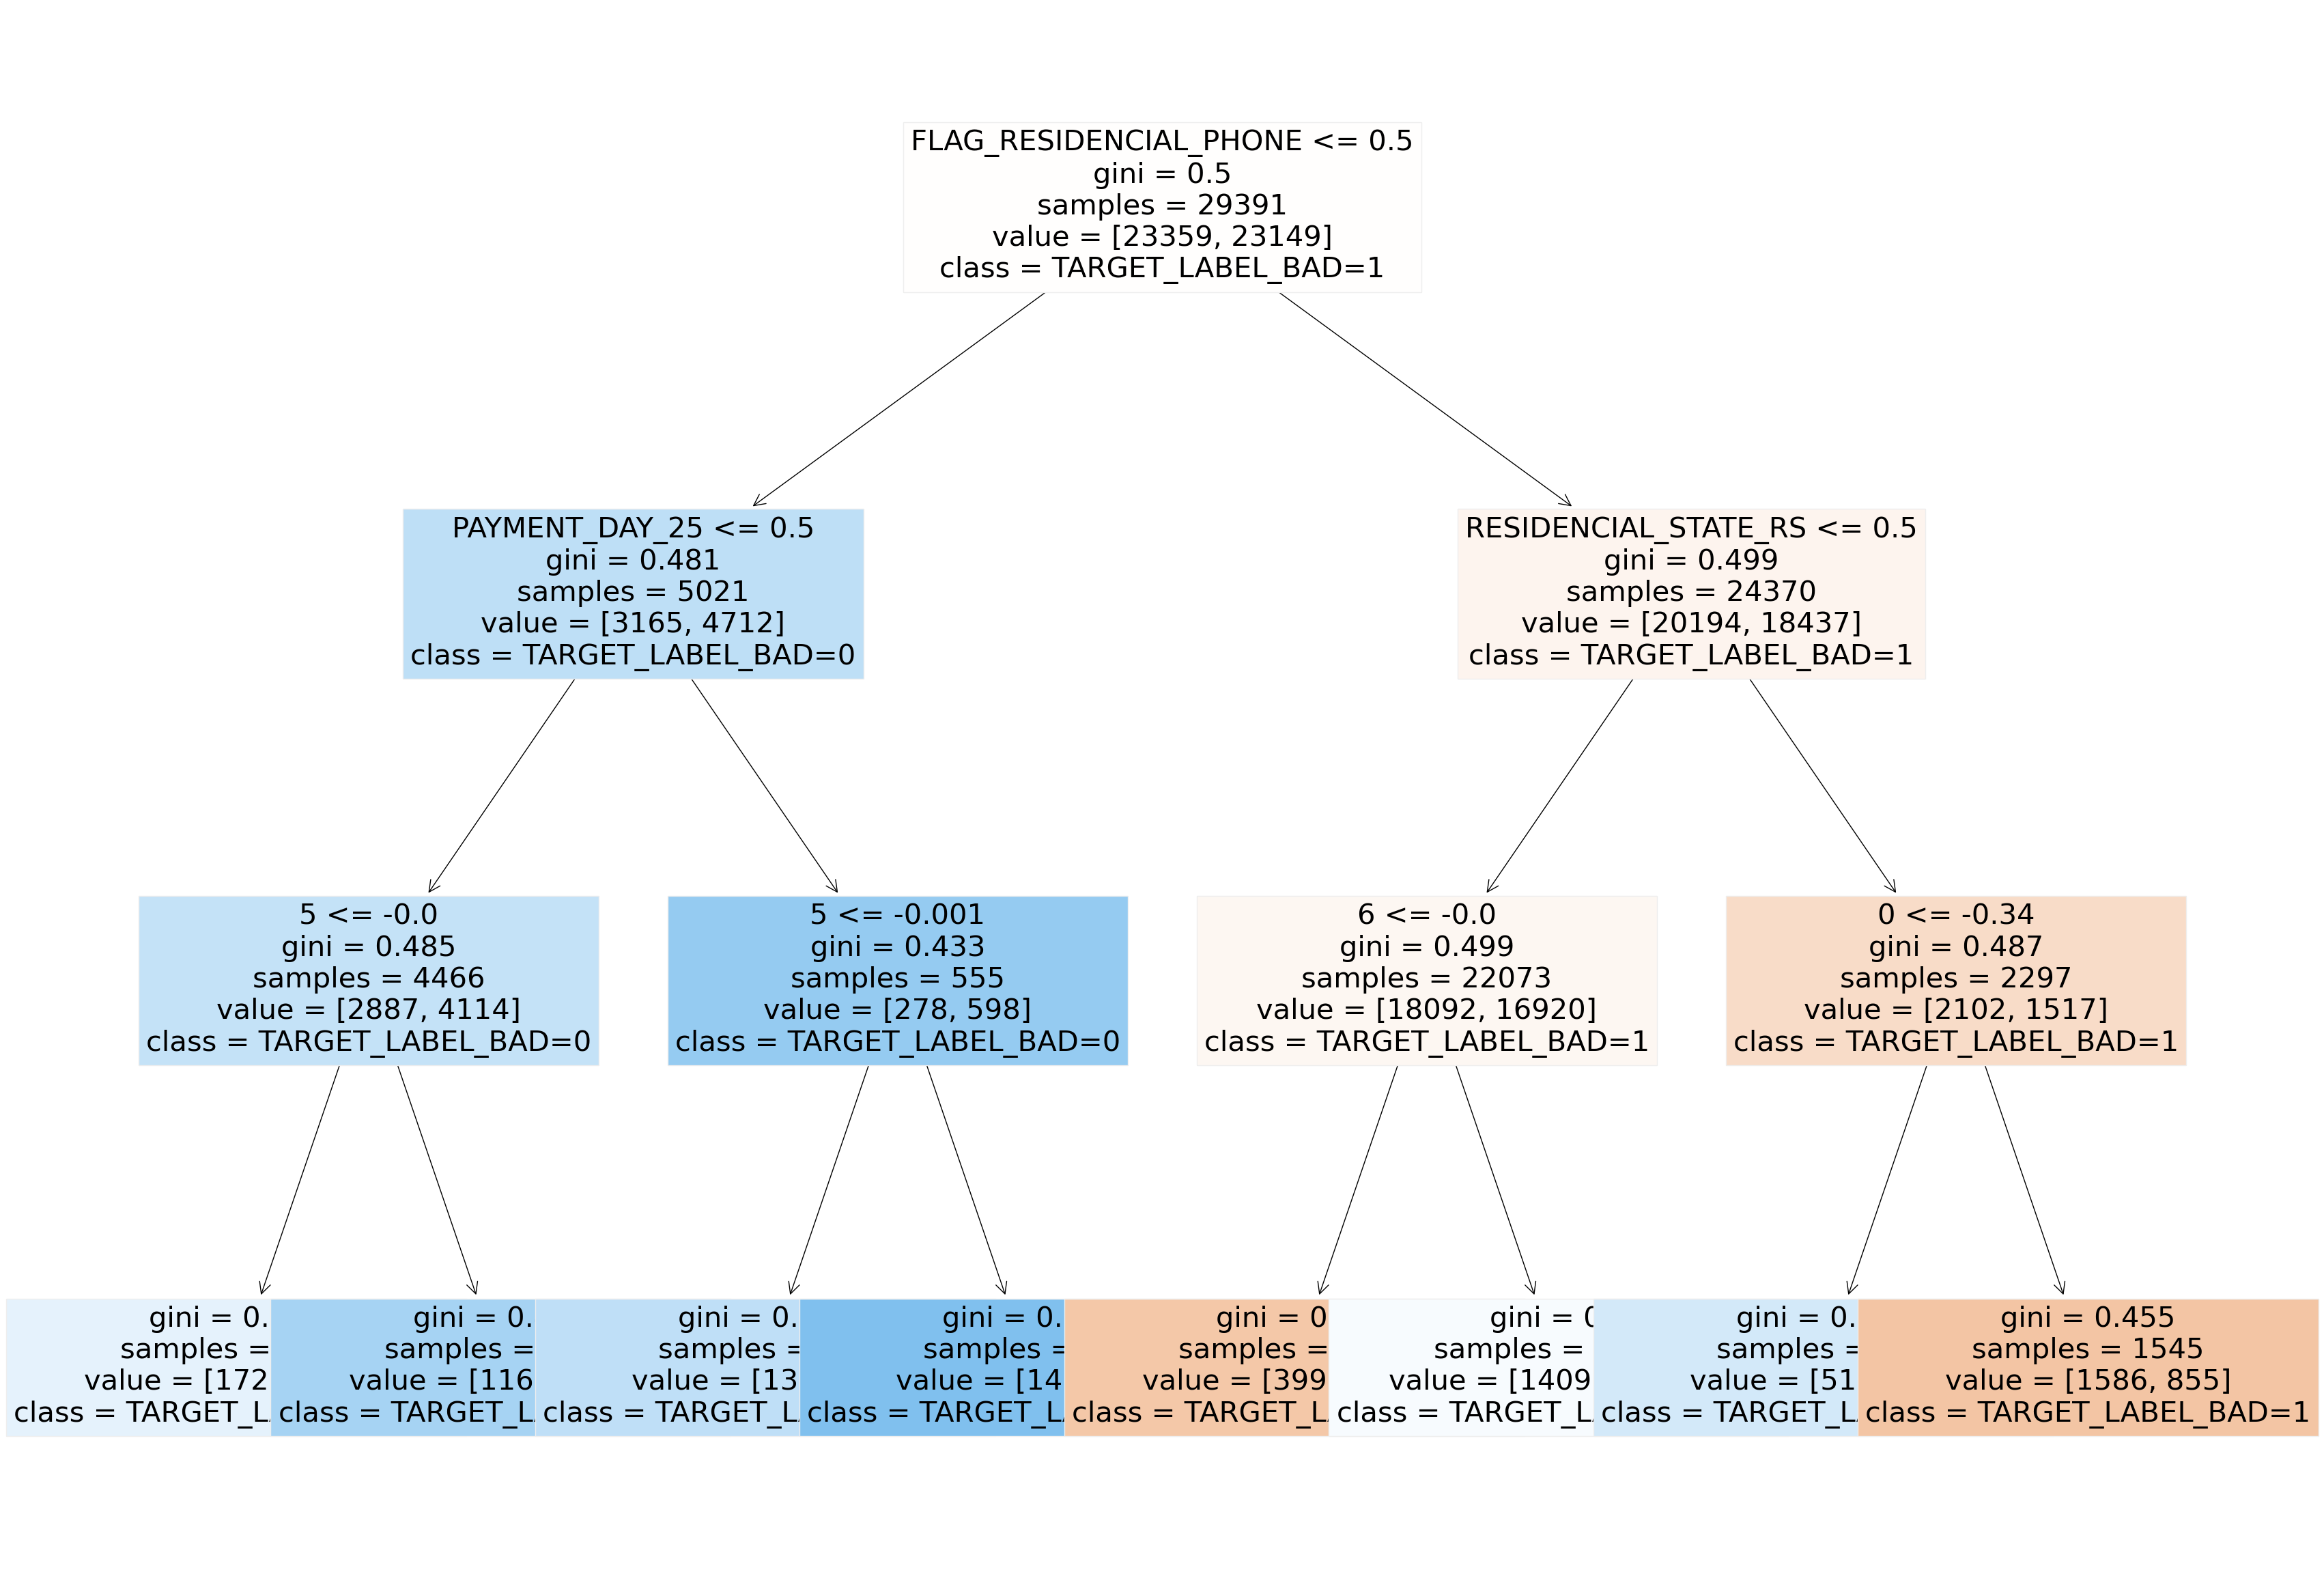

In [51]:
# Creating Random Forest with Max Depth value of 3
rf_max_depth = RandomForestClassifier(n_estimators=100, max_depth=3) 
rf_max_depth.fit(X_train, Y_train.values.ravel())

# Drawing The Tree
draw_tree(rf_max_depth.estimators_[0], X_test.columns, 'random forest with max_depth')

### 6.6.4 How to handle the overfitted Random Forest 

Analyzing the result above, we found that the model is overfitted. By setting parameter 'min_samples_leaf', Overfitting will be mitigated. Therefore, we use random search to find the best min_samples_leaf(parameter) for the random forest, and draw a line graph for the results to see how the train accuracy and test accuracy will be influenced by different values of 'min_samples_leaf'.

In [52]:
def rf_overfitted(X_train, X_test, Y_train, Y_test, X):
    leaves = np.arange(1,101,10).tolist()  
    
    # store accuracies
    Train_Accuracies = []
    Test_Accuracies = []
    
    for leaf in leaves:
        rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=leaf) 
        rf.fit(X_train, Y_train.values.ravel())
        prediction_train = rf.predict(X_train)
        prediction_test = rf.predict(X_test)
        
        Train_Accuracy = accuracy(np.array(Y_train), prediction_train) 
        Test_Accuracy = accuracy(np.array(Y_test), prediction_test)
        
        Train_Accuracies.append(Train_Accuracy)
        Test_Accuracies.append(Test_Accuracy)
    
                
    # draw line graph
    plt.figure(figsize=(10, 8), dpi=200)
    plt.title('train and test accuracy in different min_samples_leaf param for random forest')
    plt.plot(leaves, Train_Accuracies, color='green', label='training accuracy')
    plt.plot(leaves, Test_Accuracies, color='red', label='testing accuracy')
    plt.legend(fontsize=12)
    
    plt.xlabel("min_samples_leaf")
    plt.ylabel("Accuracy")
    plt.savefig("Compare with accuracies with different params.png") 
    plt.show()

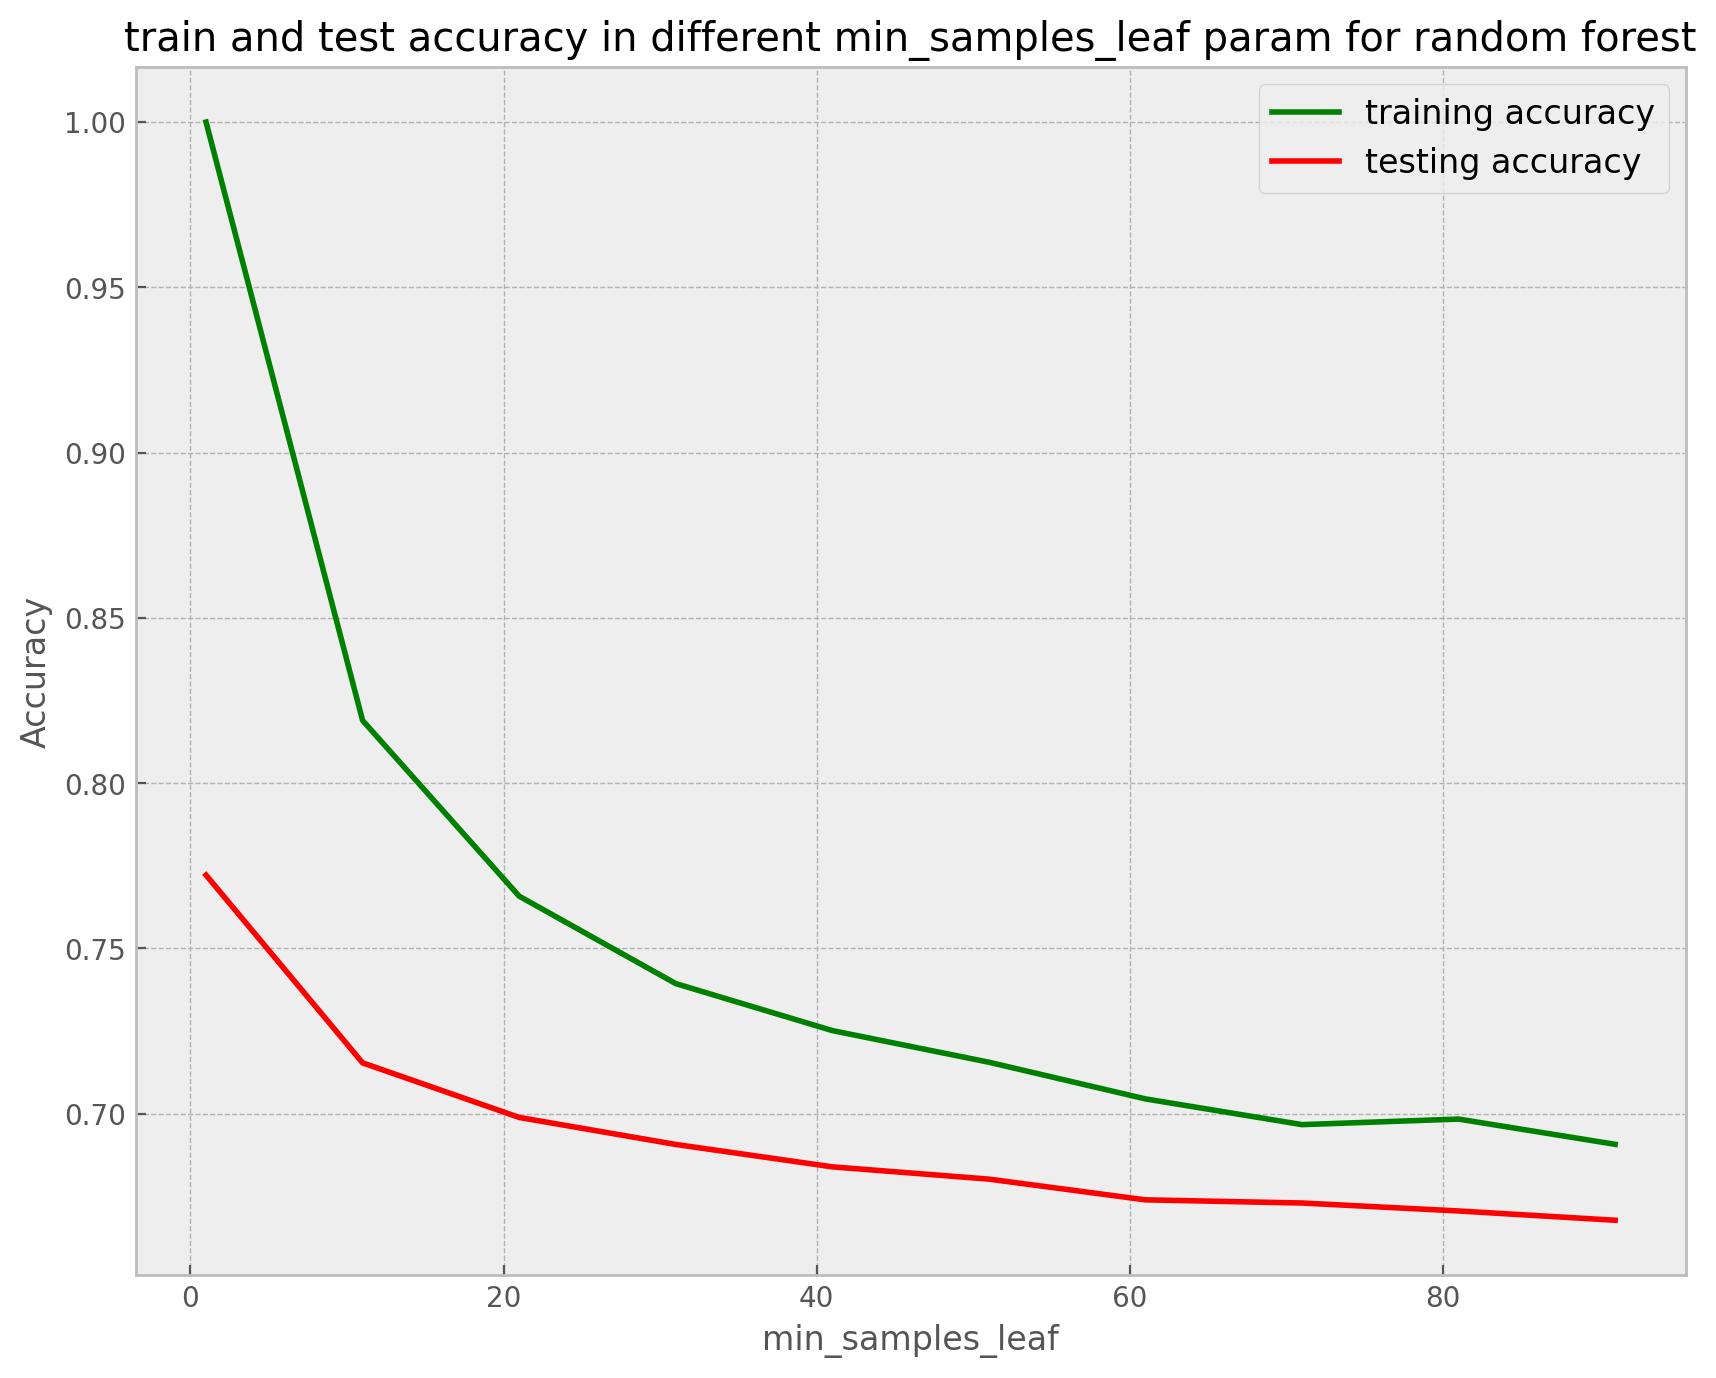

In [53]:
# The train Accuracy and Test Accuracy of Random Forest with different params of Minimum Sample of Leaf
rf_overfitted(X_train, X_test, Y_train, Y_test, X) 

### Evaluation

We found that the Random Forest model is overfitted, but the accuracy is better than Decision Tree and Logistic Regression.

## 6.7 AdaBoost

In [54]:
def AdaBoost(X_train, X_test, Y_train, Y_test, X):
    ada = AdaBoostClassifier()
    ada.fit(X_train, Y_train.values.ravel())
    prediction_train = ada.predict(X_train)
    prediction_test = ada.predict(X_test)
    
    # AdaBoost - 5 most important features
    print('\nthe 5 most important features in AdaBoost:\n')
    for c, column in enumerate(X_test.columns):
        if ada.feature_importances_[c] in sorted(ada.feature_importances_)[-5:]:
            print('Variable', column, ada.feature_importances_[c])
  
    return prediction_train, prediction_test

In [55]:
# AdaBoost
BOOST_prediction_train, BOOST_prediction_test = AdaBoost(X_train, X_test, Y_train, Y_test, X) 

# Evaluate the AdaBoost model
print('\n\n--------Evaluation for the AdaBoost-------- \n')
Model_Evaluation('AdaBoost', BOOST_prediction_train, BOOST_prediction_test, np.array(Y_train), np.array(Y_test))


the 5 most important features in AdaBoost:

Variable 1 0.04
Variable 2 0.16
Variable 3 0.06
Variable 4 0.4
Variable 5 0.04


--------Evaluation for the AdaBoost-------- 

Train Accuracy:  0.6702287778446718
Test Accuracy:  0.6635059201284367
Test RMSE:  0.5800810976678721
Test AUC: 0.6635055393353522
Test Confusion Matrix: 
[[6595 3347]
 [3360 6630]]
Test precision score: 0.6645284153553173
Test recall score: 0.6636636636636637


## 6.8 Support Vector Machine (SVM)

### 6.8.1 SVM without Random Search

In [56]:
def SVM(X_train, X_test, Y_train, Y_test):
    # The gamma parameter is the kernel coefficient for kernels rbf/poly/sigmoid
    svm = SVC(gamma='auto')

    svm.fit(X_train, Y_train.values.ravel())
    prediction_train = svm.predict(X_train)
    prediction_test = svm.predict(X_test)
    print('The params of SVM:\n', svm.get_params())
          
    return prediction_train, prediction_test

In [57]:
# SVM without Random Search
SVM_prediction_train, SVM_prediction_test = SVM(X_train, X_test, Y_train, Y_test) 

# Evaluate the SVM without Random Search model
print('\n\n--------Evaluation for the SVM-------- \n')
Model_Evaluation('SVM', SVM_prediction_train, SVM_prediction_test, np.array(Y_train), np.array(Y_test))

The params of SVM:
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


--------Evaluation for the SVM-------- 

Train Accuracy:  0.6649178635933602
Test Accuracy:  0.6599438089504315
Test RMSE:  0.5831433709213957
Test AUC: 0.6599957229408044
Test Confusion Matrix: 
[[6776 3166]
 [3612 6378]]
Test precision score: 0.6682732606873428
Test recall score: 0.6384384384384384


### 6.8.2 SVM with Random Search

In [58]:
def SVM_RandomSCV(X_train, X_test, Y_train, Y_test):
    seed = np.random.seed(30)
    # The gamma parameter is the kernel coefficient for kernels rbf/poly/sigmoid
    svm = SVC(C=10, kernel='rbf')
  
    # try different parameters
    parameters = {'gamma': [1,0.1], 'C':[1, 10]}
    random_search = RandomizedSearchCV(svm, 
                                       parameters, 
                                       cv=2,
                                       scoring='roc_auc',
                                       random_state=123).fit(X_train, Y_train.values.ravel())
    
    best_param = random_search.best_params_
    print('The best param for SVM model:', best_param)
    
    # try the SVM with best param
    svm = SVC(C=best_param['C'], kernel='rbf', gamma=best_param['gamma'])
    svm.fit(X_train, Y_train.values.ravel())
    prediction_train = svm.predict(X_train)
    prediction_test = svm.predict(X_test)
    print('The params of SVM:\n', svm.get_params())
          
    return prediction_train, prediction_test

In [59]:
# SVM with Random Search
SVM_RS_prediction_train, SVM_RS_prediction_test = SVM_RandomSCV(X_train, X_test, Y_train, Y_test) 

# Evaluate the SVM with Random Search model
print('\n\n--------Evaluation for the SVM with best param-------- \n')
Model_Evaluation('SVM with Random Search', SVM_RS_prediction_train, SVM_RS_prediction_test, np.array(Y_train), np.array(Y_test))

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


The best param for SVM model: {'gamma': 0.1, 'C': 10}
The params of SVM:
 {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


--------Evaluation for the SVM with best param-------- 

Train Accuracy:  0.7417648576588974
Test Accuracy:  0.7002307846678708
Test RMSE:  0.5475118403579317
Test AUC: 0.7002910272976657
Test Confusion Matrix: 
[[7211 2731]
 [3244 6746]]
Test precision score: 0.7118286377545637
Test recall score: 0.6752752752752753


# 7. Visualization

## 7.1 ROC curve (Receiver Operating Characteristic Curve)

By visualising the ROC curve, we are able to know the False Positive Rate (FPR) and True Positive Rate (TPR) of the model.

In [60]:
# draw the ROC Curve
def ROC(fprs, tprs):
    plt.figure(dpi=200)
    model_names = list(fprs.keys())  # a list contains all the model names
    # drawing ROC Curve for each model one by one
    for model_name in model_names:
        roc_auc = auc(fprs[model_name],tprs[model_name])
        plt.plot(fprs[model_name], tprs[model_name], lw=2, alpha=0.3, label='ROC curve %s (AUC = %0.2f)' % (model_name, roc_auc))
   
    
    plt.title('Receiver operating characteristics curve Comparison')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim ([0,1])
    plt.ylim ([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend (bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig("ROC.png", bbox_inches='tight')  # 保存图片
    plt.show()

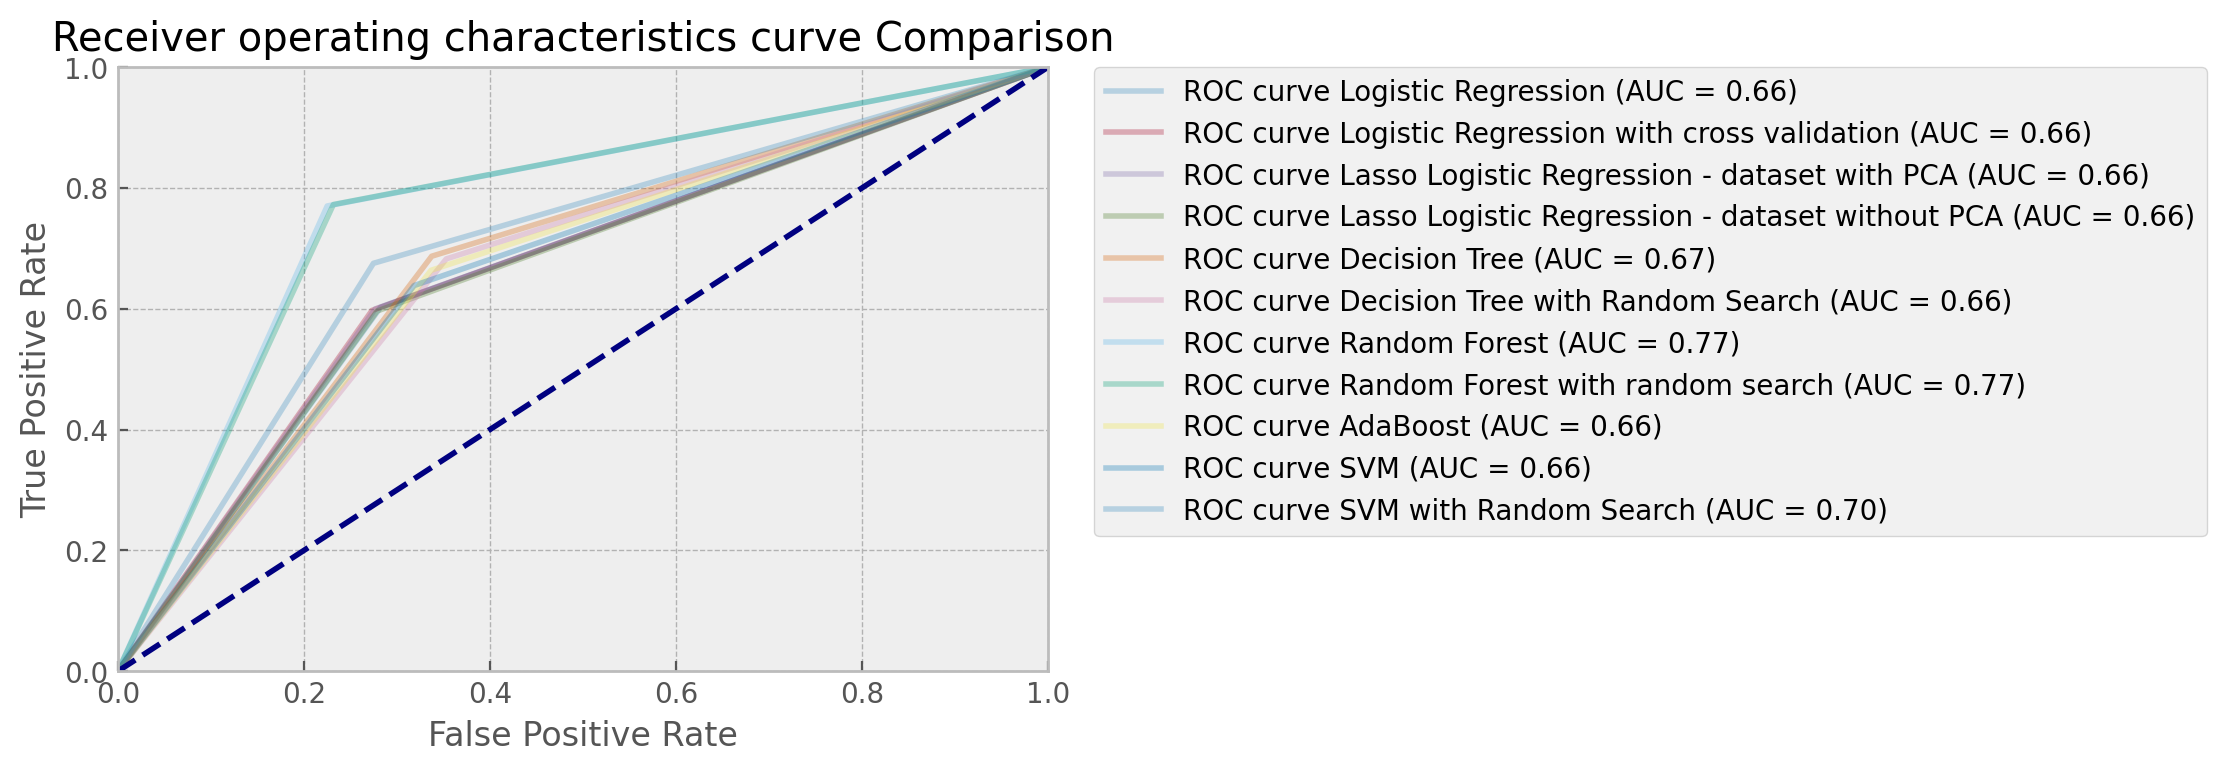

In [61]:
ROC(fprs, tprs)

## 7.2 Bar Chart for all evaluation indexes

In [62]:
def visualization_bar(data):
    sns.set()
    fig, axes = plt.subplots(2, 2, figsize=(15,10), dpi=200)
    plt.xticks ()
    plt.suptitle ('Comparison Train Accuracy, Test Accuracy, Precision, and Recall')

    sns.barplot (x="Train Accuracy", y="model used", data=data, palette='rocket', edgecolor=sns.color_palette('dark',7), ax=axes[0,0])
    sns.barplot (x="Test Accuracy", y="model used", data=data, palette='rocket', edgecolor=sns.color_palette('dark',7), ax=axes[0,1])
    sns.barplot (x="Precision", y="model used", data=data, palette='rocket', edgecolor=sns.color_palette('dark',7), ax=axes[1,0])
    sns.barplot (x="Recall", y="model used", data=data, palette='rocket', edgecolor=sns.color_palette('dark',7), ax=axes[1,1])

   
    axes[0,0].set_title('Comparison Train Accuracy for Each Algorithm')
    axes[0,1].set_title('Comparison Test Accuracy for Each Algorithm')
    axes[1,0].set_title('Comparison Precision for Each Algorithm')
    axes[1,1].set_title('Comparison Recall for Each Algorithm')

    plt.tight_layout()
    plt.savefig ('Comparison.png')

Dictionary 'dist_evaluation' contains all the results for evaluation indexes

In [63]:
dist_evaluation

{'Train Accuracy': {'Logistic Regression': 0.6645738367592672,
  'Logistic Regression with cross validation': 0.6668960178893953,
  'Lasso Logistic Regression - dataset with PCA': 0.6667885095037412,
  'Lasso Logistic Regression - dataset without PCA': 0.6633697428399415,
  'Decision Tree': 0.9999569966457383,
  'Decision Tree with Random Search': 0.7040079126171841,
  'Random Forest': 0.9999569966457383,
  'Random Forest with random search': 0.9992259396232906,
  'AdaBoost': 0.6702287778446718,
  'SVM': 0.6649178635933602,
  'SVM with Random Search': 0.7417648576588974},
 'Test Accuracy': {'Logistic Regression': 0.6598936383704596,
  'Logistic Regression with cross validation': 0.6619004615693358,
  'Lasso Logistic Regression - dataset with PCA': 0.6614489263495886,
  'Lasso Logistic Regression - dataset without PCA': 0.658639373871162,
  'Decision Tree': 0.6748444712020871,
  'Decision Tree with Random Search': 0.6648103552077061,
  'Random Forest': 0.7725767609873571,
  'Random Fore

### 7.2.1 Changing the type of data for visualization

We need to convert the dictionary 'dist_evaluation' to the dataframe 'evaluation_data' to apply seaborn as visualisation.

In [64]:
# Getting the values
model_names = list(dist_evaluation['Train Accuracy'].keys())
train_acc = list(dist_evaluation['Train Accuracy'].values())
test_acc = list(dist_evaluation['Test Accuracy'].values())
precision = list(dist_evaluation['Precision'].values())
recall = list(dist_evaluation['Recall'].values())

# Storing all values in the same dataset
data = []
for i in range(len(model_names)):
    data.append([model_names[i], train_acc[i], test_acc[i], precision[i], recall[i]])

evaluation_data = pd.DataFrame(data=data, 
                    columns=['model used', 'Train Accuracy', 'Test Accuracy', 
                             'Precision', 'Recall'])
evaluation_data

,model used,Train Accuracy,Test Accuracy,Precision,Recall
0,Logistic Regression,0.664574,0.659894,0.681885,0.602503
1,Logistic Regression with cross validation,0.666896,0.661900,0.687205,0.597297
2,Lasso Logistic Regression - dataset with PCA,0.666789,0.661449,0.685384,0.599900
3,Lasso Logistic Regression - dataset without PCA,0.663370,0.658639,0.682558,0.596196
4,Decision Tree,0.999957,0.674844,0.671724,0.686987
5,Decision Tree with Random Search,0.704008,0.664810,0.660180,0.682583
6,Random Forest,0.999957,0.772577,0.774746,0.770170
7,Random Forest with random search,0.999226,0.770470,0.770183,0.772573
8,AdaBoost,0.670229,0.663506,0.664528,0.663664
9,SVM,0.664918,0.659944,0.668273,0.638438


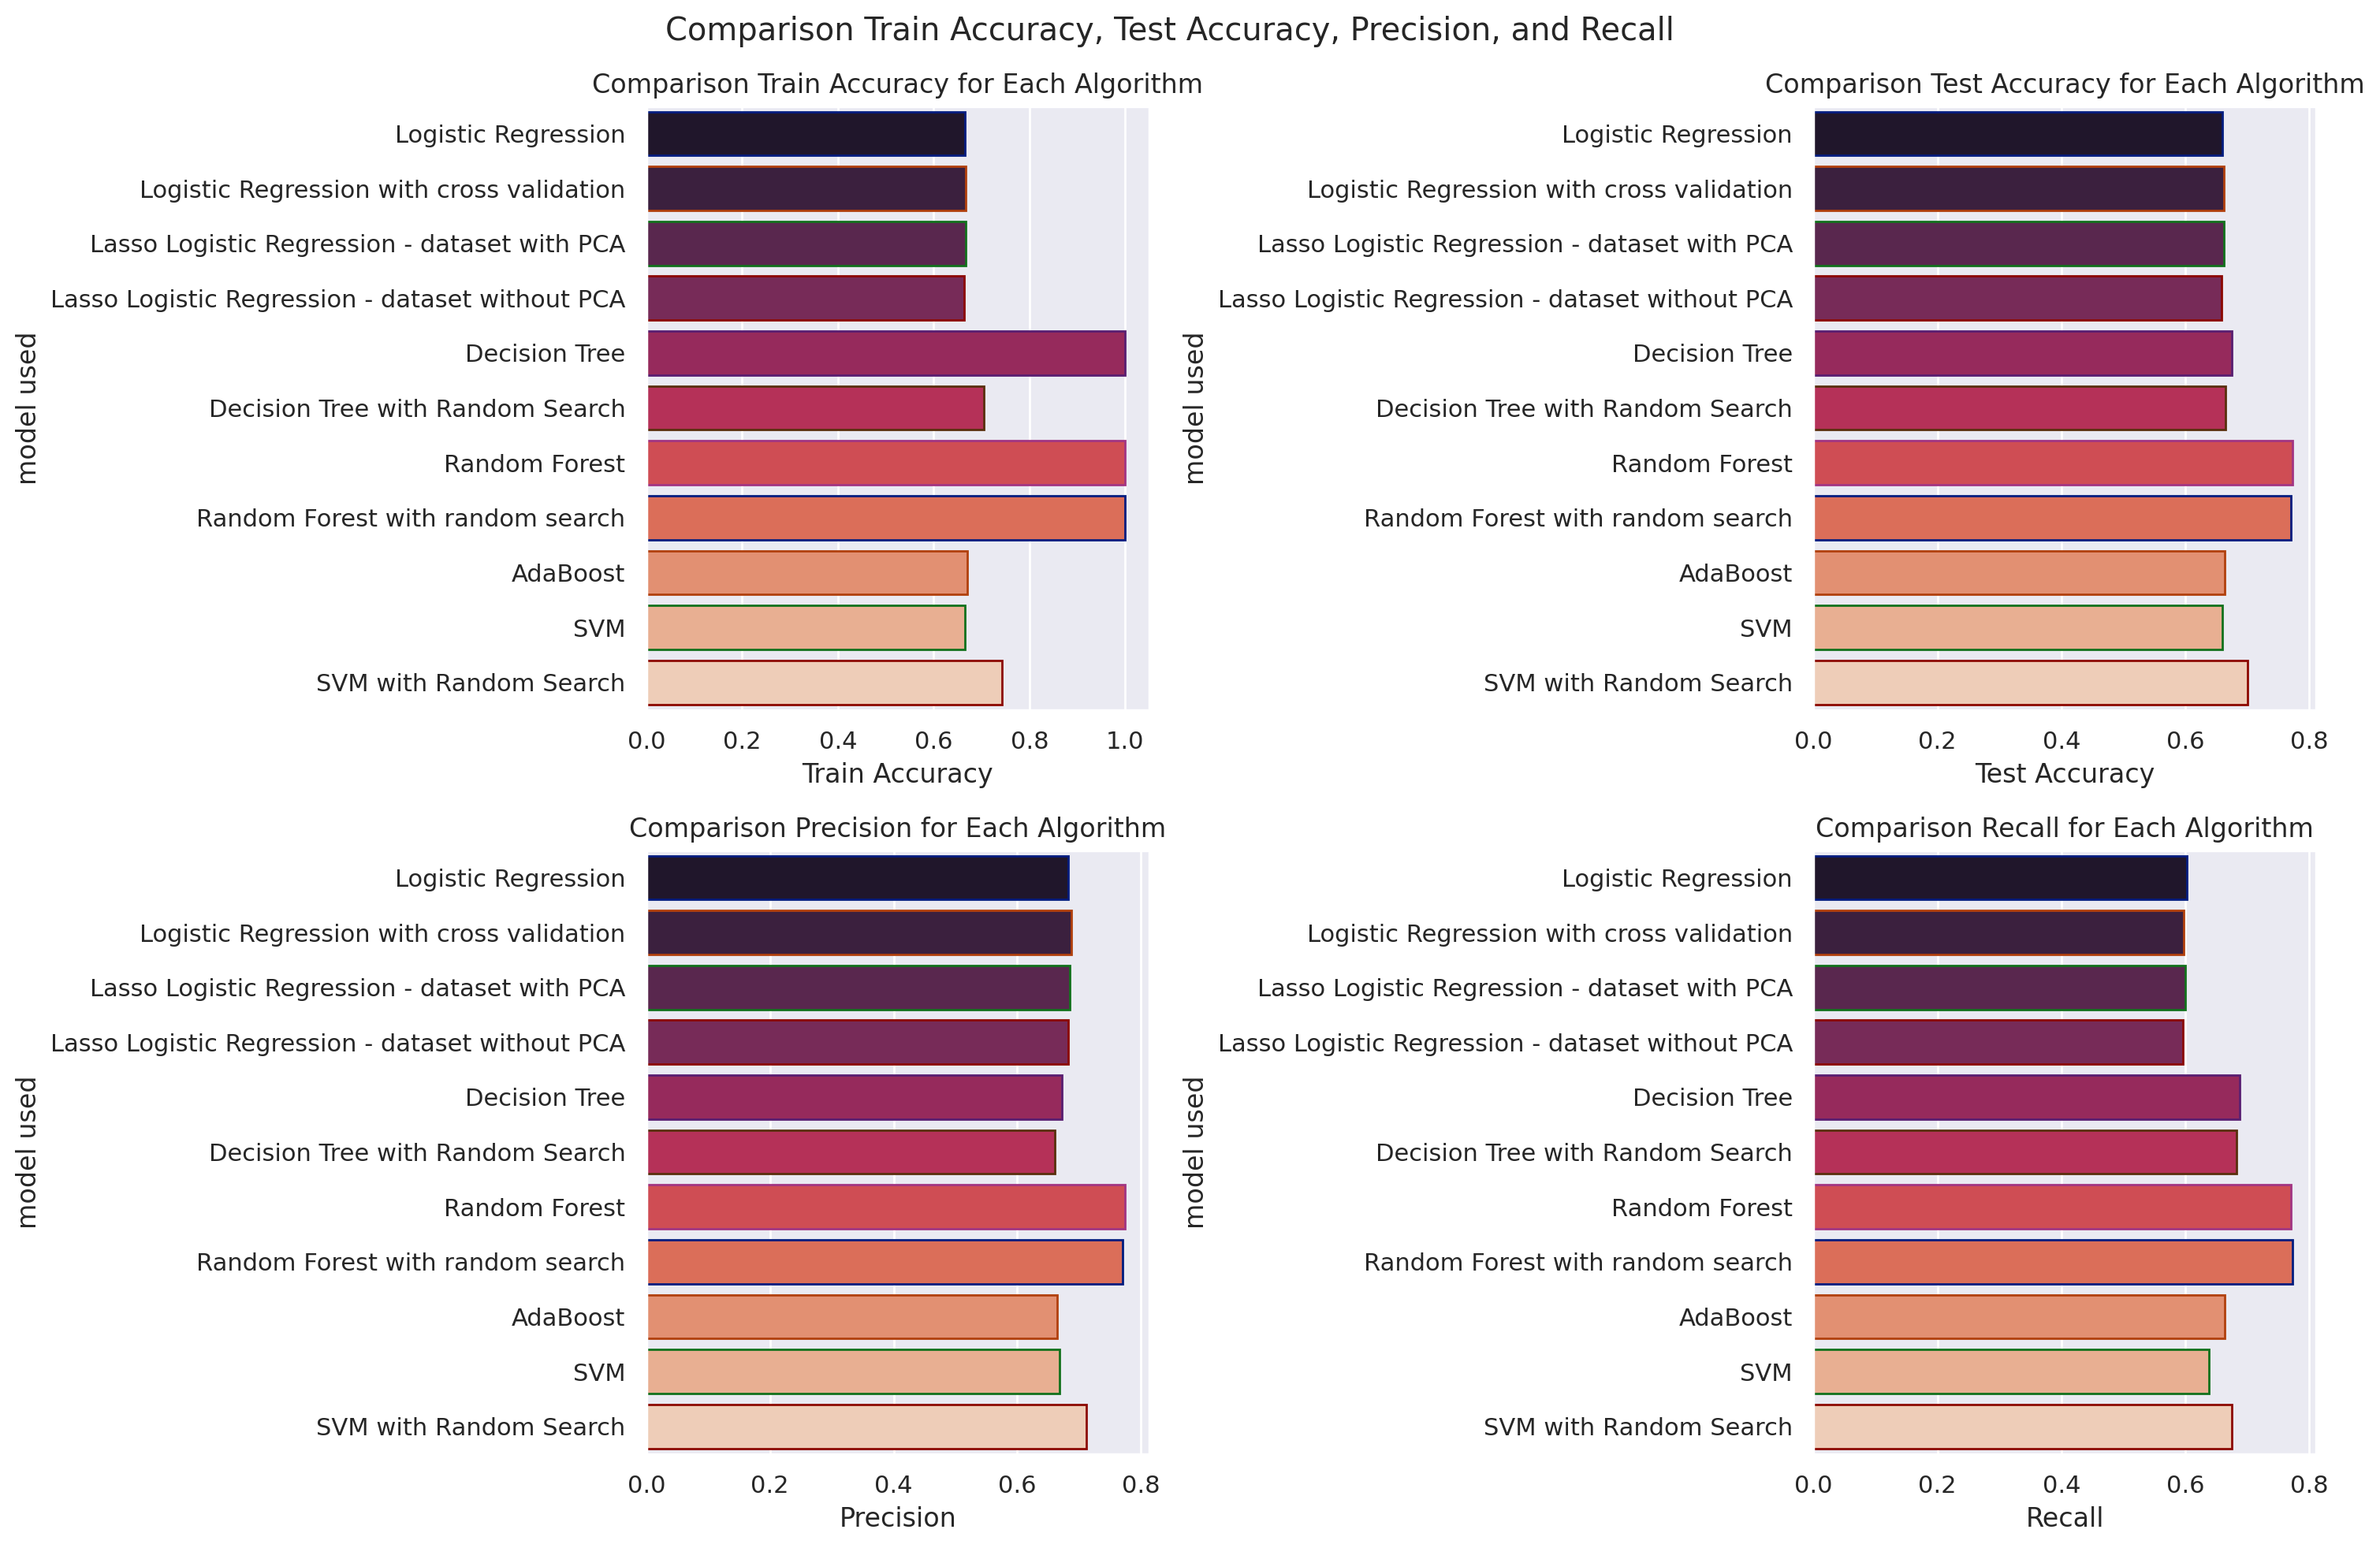

In [65]:
visualization_bar(evaluation_data)